# Should we chase for a higher educational degree?

## The cost of having a higher educational degree

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
tuition_fees_df = pd.read_csv("./sample_data/tuition_fees_in_current_dollar.csv")

In [3]:
# Data Cleaning
# Convert 'Academic Year' to datetime (assuming start of academic year)
tuition_fees_df['Academic Year'] = pd.to_datetime(tuition_fees_df['Academic Year'].apply(lambda x: '19' + x.split('-')[0] if int(x.split('-')[0]) > 50 else '20' + x.split('-')[0]))

# Function to clean monetary and percentage values
def clean_currency(x):
    return pd.to_numeric(x.replace('$', '').replace(',', ''), errors='coerce')

def clean_percentage(x):
    return pd.to_numeric(x.replace('%', ''), errors='coerce')

# Clean all monetary and percentage columns
columns_to_clean = ['Private Nonprofit Four-Year', 'Public Four-Year', 'Public Two-Year',
                    'Private Nonprofit Four-Year.1', 'Public Four-Year.1']
percentage_columns = ['One-Year % Change', 'One-Year % Change.1', 'One-Year % Change.2',
                      'One-Year % Change.3', 'One-Year % Change.4']

for col in columns_to_clean + percentage_columns:
    if 'Change' in col:
        tuition_fees_df[col] = tuition_fees_df[col].apply(clean_percentage)
    else:
        tuition_fees_df[col] = tuition_fees_df[col].apply(clean_currency)


In [4]:
tuition_fees_df.head()


,Academic Year,Private Nonprofit Four-Year,One-Year % Change,Public Four-Year,One-Year % Change.1,Public Two-Year,One-Year % Change.2,Private Nonprofit Four-Year.1,One-Year % Change.3,Public Four-Year.1,One-Year % Change.4
0,1971-01-01,1830,NaN,430,NaN,190,NaN,2930,NaN,1410,NaN
1,1972-01-01,1950,6.6,500,16.3,230,21.1,3090,5.5,1550,9.9
2,1973-01-01,2050,5.1,510,2.0,270,17.4,3220,4.2,1600,3.2
3,1974-01-01,2130,3.9,510,0.0,280,3.7,3420,6.2,1650,3.1
4,1975-01-01,2290,7.5,540,5.9,250,-10.7,3680,7.6,1780,7.9


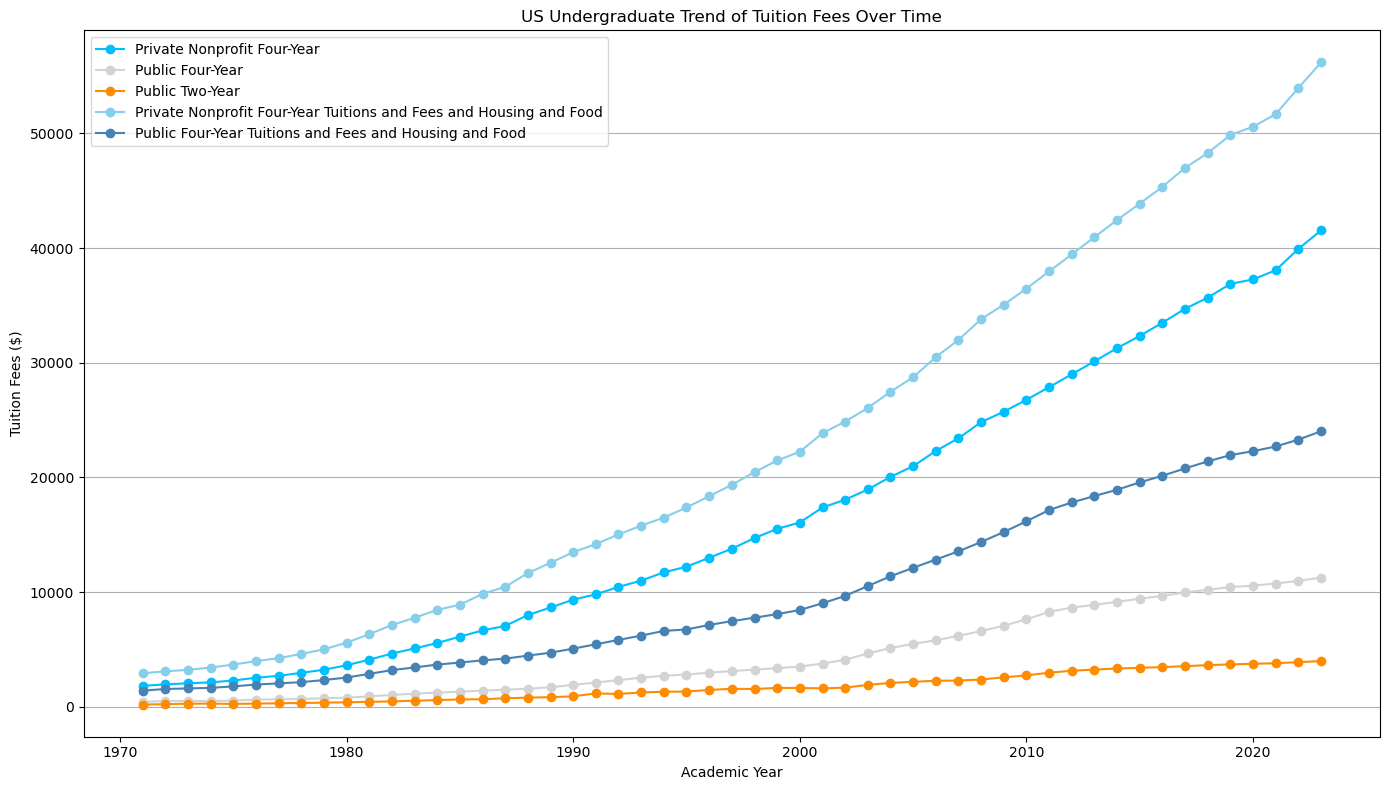

In [5]:
# Set the figure size and plot tuition fees over time
plt.figure(figsize=(14, 8))
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Private Nonprofit Four-Year'], label='Private Nonprofit Four-Year', marker='o', color = 'deepskyblue')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Public Four-Year'], label='Public Four-Year', marker='o', color = 'lightgrey')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Public Two-Year'], label='Public Two-Year', marker='o', color = 'darkorange')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Private Nonprofit Four-Year.1'], label='Private Nonprofit Four-Year Tuitions and Fees and Housing and Food', marker='o', color = 'skyblue')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Public Four-Year.1'], label='Public Four-Year Tuitions and Fees and Housing and Food', marker='o', color = 'steelblue')

# Adding labels and title
plt.title('US Undergraduate Trend of Tuition Fees Over Time')
plt.xlabel('Academic Year')
plt.ylabel('Tuition Fees ($)')
plt.legend()


plt.tight_layout()

plt.grid(True, axis = 'y')

# Save the plot to desktop
plt.savefig('./output/US Undergraduate Trend of Tuition Fees Over Time.png')
# Show plot
plt.show()


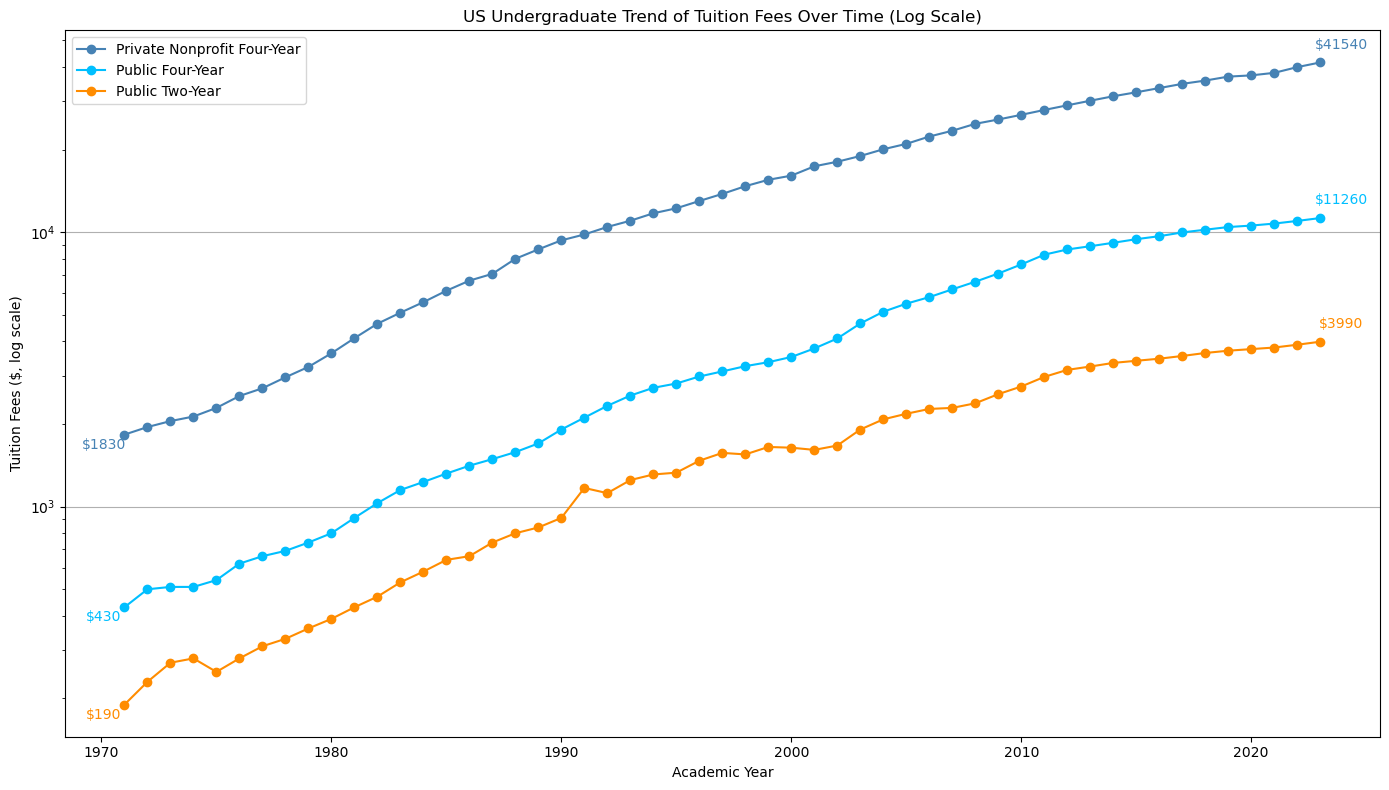

In [6]:
# Set the figure size and plot tuition fees over time with annotations
plt.figure(figsize=(14, 8))
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Private Nonprofit Four-Year'], label='Private Nonprofit Four-Year', marker='o', color = 'steelblue')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Public Four-Year'], label='Public Four-Year', marker='o', color = 'deepskyblue')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Public Two-Year'], label='Public Two-Year', marker='o', color = 'darkorange')

# Annotations for the first and last points
for column, color in zip(['Private Nonprofit Four-Year', 'Public Four-Year', 'Public Two-Year'], ['steelblue', 'deepskyblue','darkorange']):
    # First point
    plt.annotate(f"${tuition_fees_df[column].iloc[0]}",
                 (tuition_fees_df['Academic Year'].iloc[0], tuition_fees_df[column].iloc[0]),
                 textcoords="offset points", xytext=(-15,-10), ha='center', color=color)
    # Last point
    plt.annotate(f"${tuition_fees_df[column].iloc[-1]}",
                 (tuition_fees_df['Academic Year'].iloc[-1], tuition_fees_df[column].iloc[-1]),
                 textcoords="offset points", xytext=(15,10), ha='center', color=color)

# Adding labels and title
plt.title('US Undergraduate Trend of Tuition Fees Over Time (Log Scale)')
plt.xlabel('Academic Year')
plt.ylabel('Tuition Fees ($, log scale)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend()

# Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

plt.grid(True, axis = 'y')

#save output
plt.savefig('./output/US Undergraduate Trend of Tuition Fees Over Time (Log Scale).jpg')

# Show plot
plt.show()



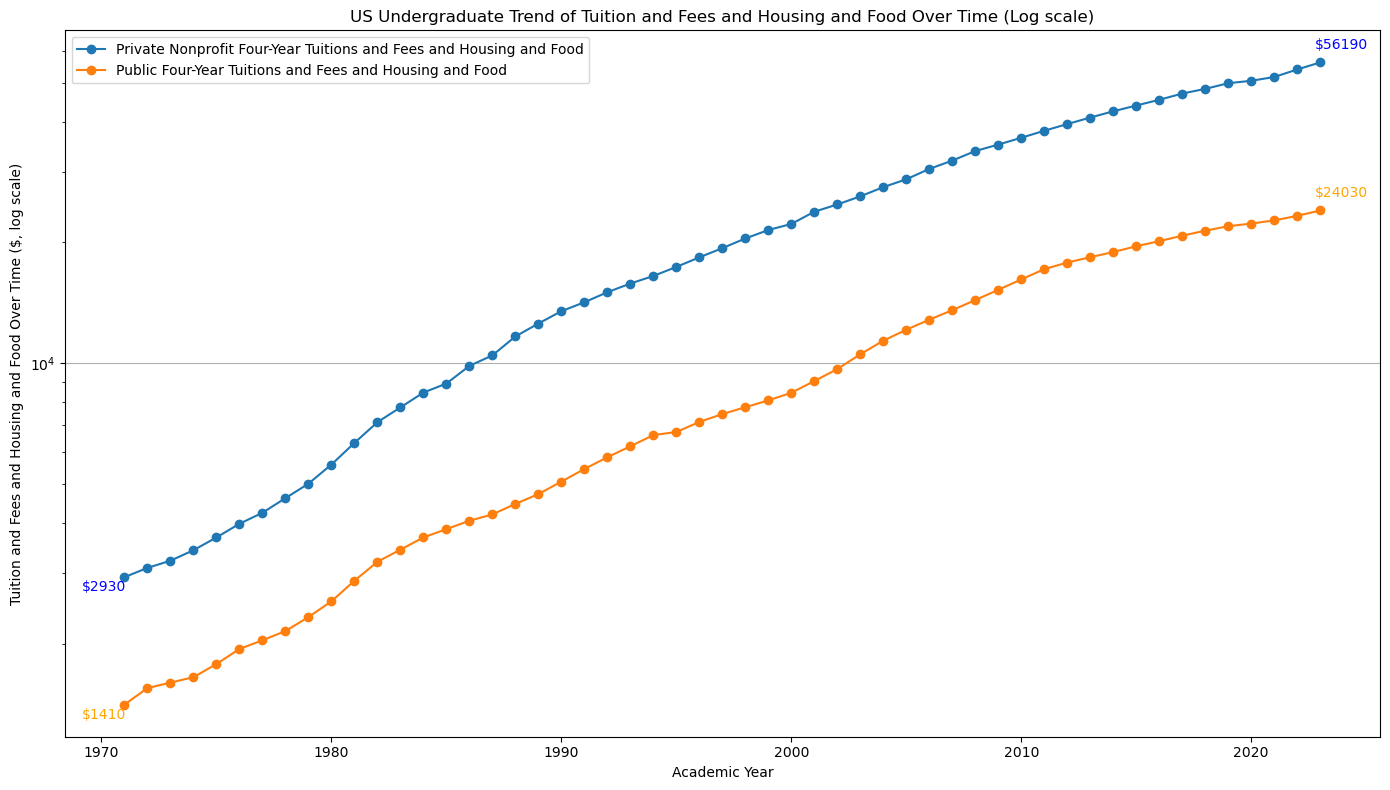

In [7]:
# Set the figure size and plot tuition fees over time with annotations
plt.figure(figsize=(14, 8))
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Private Nonprofit Four-Year.1'], label='Private Nonprofit Four-Year Tuitions and Fees and Housing and Food', marker='o')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['Public Four-Year.1'], label='Public Four-Year Tuitions and Fees and Housing and Food', marker='o')


# Annotations for the first and last points
for column, color in zip(['Private Nonprofit Four-Year.1', 'Public Four-Year.1'], ['blue', 'orange']):
    # First point
    plt.annotate(f"${tuition_fees_df[column].iloc[0]}",
                 (tuition_fees_df['Academic Year'].iloc[0], tuition_fees_df[column].iloc[0]),
                 textcoords="offset points", xytext=(-15,-10), ha='center', color=color)
    # Last point
    plt.annotate(f"${tuition_fees_df[column].iloc[-1]}",
                 (tuition_fees_df['Academic Year'].iloc[-1], tuition_fees_df[column].iloc[-1]),
                 textcoords="offset points", xytext=(15,10), ha='center', color=color)

# Adding labels and title
plt.title('US Undergraduate Trend of Tuition and Fees and Housing and Food Over Time (Log scale)')
plt.xlabel('Academic Year')
plt.ylabel('Tuition and Fees and Housing and Food Over Time ($, log scale)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend()
plt.grid(True, axis = 'y')
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

#save output
plt.savefig('./output/US Undergraduate Trend of Tuition and Fees and Housing and Food Over Time (Log scale).jpg')

# Show plot
plt.show()


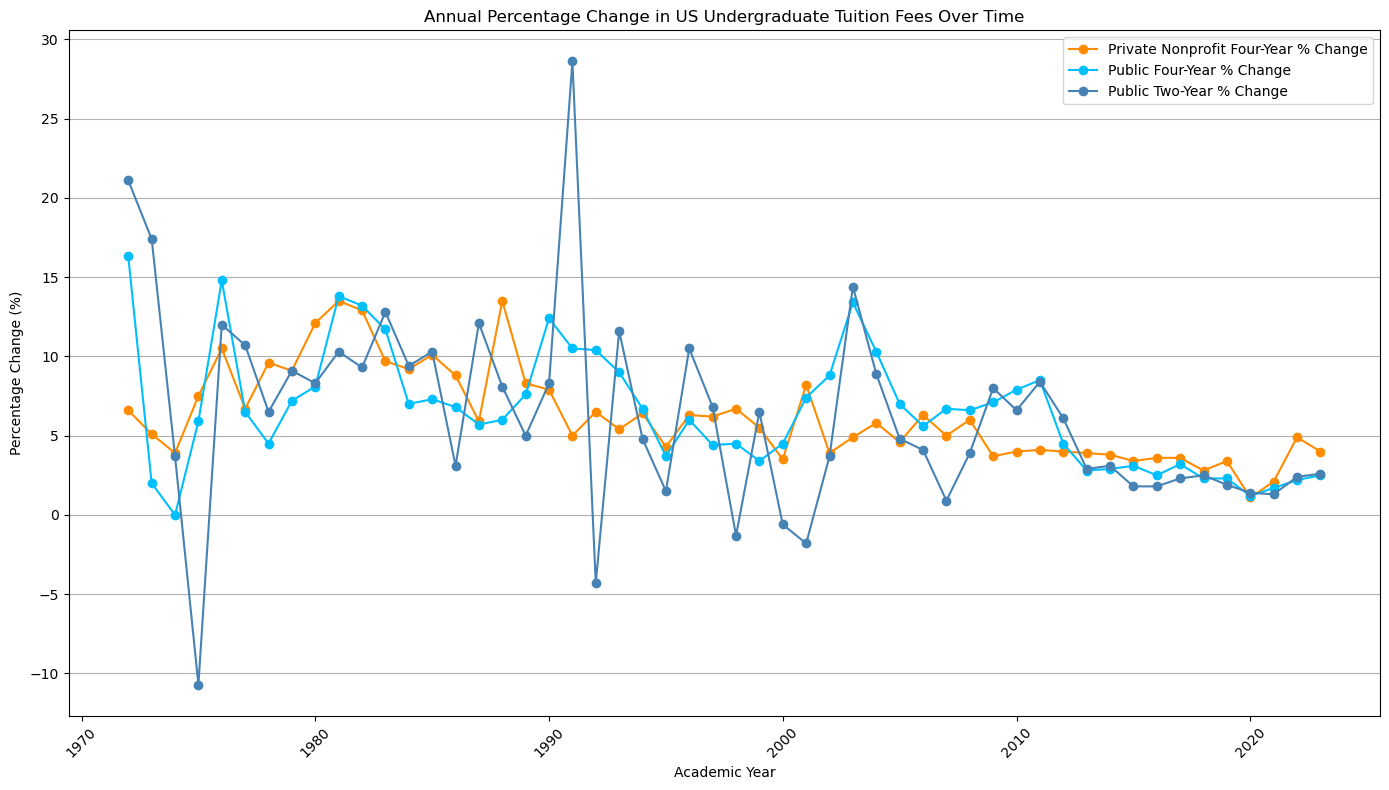

In [8]:
# Set the figure size and plot percentage changes over time
plt.figure(figsize=(14, 8))
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['One-Year % Change'], label='Private Nonprofit Four-Year % Change', marker='o', color = 'darkorange')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['One-Year % Change.1'], label='Public Four-Year % Change', marker='o', color = 'deepskyblue')
plt.plot(tuition_fees_df['Academic Year'], tuition_fees_df['One-Year % Change.2'], label='Public Two-Year % Change', marker='o', color = 'steelblue')

# Adding labels and title
plt.title('Annual Percentage Change in US Undergraduate Tuition Fees Over Time')
plt.xlabel('Academic Year')
plt.ylabel('Percentage Change (%)')
plt.legend()

# Rotate date labels for better visibility
plt.xticks(rotation=45)

plt.grid(True, axis = 'y')
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

#save output
plt.savefig('./output/Annual Percentage Change in US Undergraduate Tuition Fees Over Time.jpg')

# Show plot
plt.show()


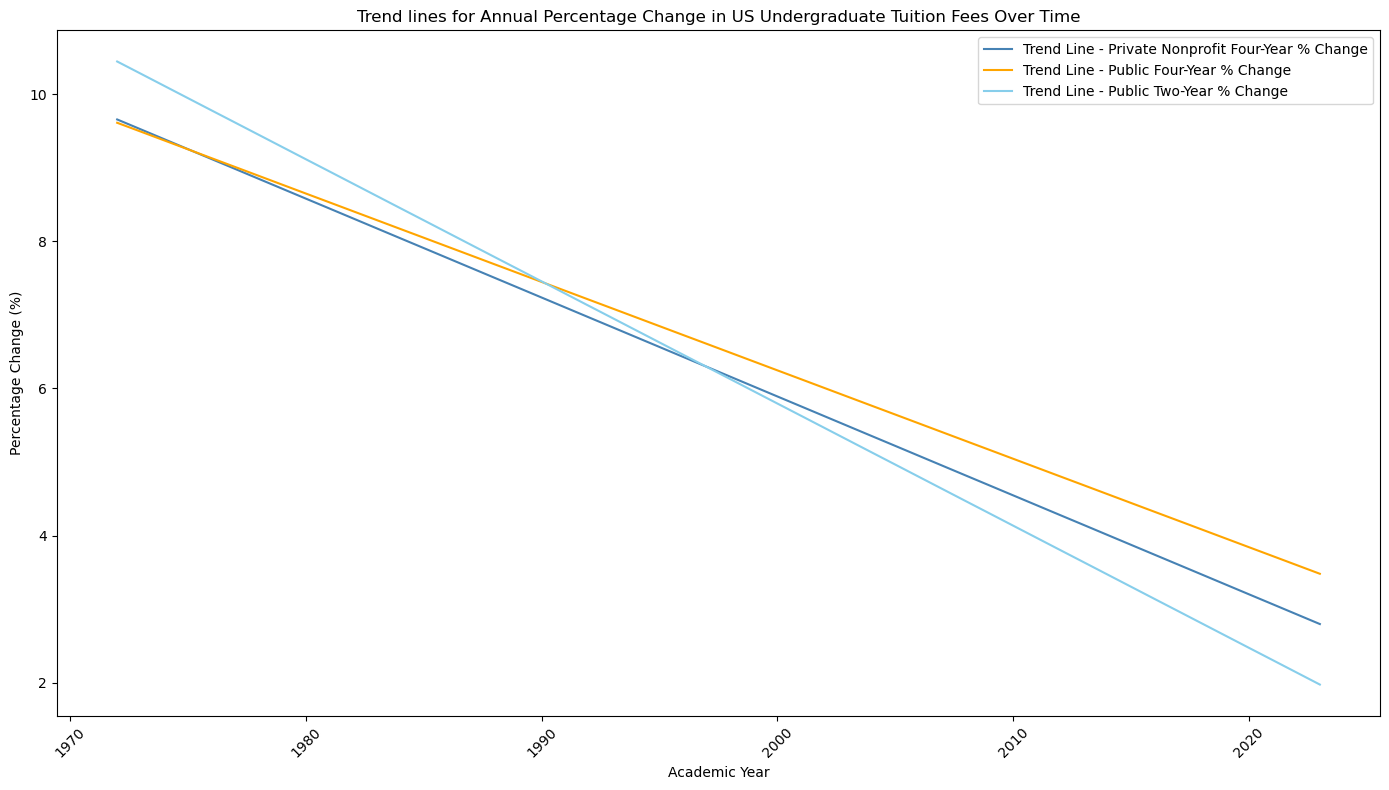

In [9]:
# Set the figure size and plot percentage changes over time with trend lines
plt.figure(figsize=(14, 8))

# Categories and colors for plotting and trend lines
categories = [
    ('One-Year % Change', 'Private Nonprofit Four-Year % Change', 'steelblue'),
    ('One-Year % Change.1', 'Public Four-Year % Change', 'orange'),
    ('One-Year % Change.2', 'Public Two-Year % Change', 'skyblue')
]

# Plotting each category with a trend line
for category, label, color in categories:
    # Data preparation
    x = np.arange(len(tuition_fees_df))  # Numerical x-axis for trend line calculation
    y = tuition_fees_df[category].dropna()  # Remove NaN values for fitting
    x_for_trend = np.arange(len(y))

    # Calculating and plotting trend line
    fit = np.polyfit(x_for_trend, y, 1)  # Linear fit
    trend_line = np.poly1d(fit)(x_for_trend)
    plt.plot(tuition_fees_df['Academic Year'][tuition_fees_df[category].notna()], trend_line, linestyle='-', color=color, label=f'Trend Line - {label}')

# Adding labels and title
plt.title('Trend lines for Annual Percentage Change in US Undergraduate Tuition Fees Over Time')
plt.xlabel('Academic Year')
plt.ylabel('Percentage Change (%)')
plt.legend()

# Rotate date labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

#save output
plt.savefig('./output/Trend lines for Annual Percentage Change in US Undergraduate Tuition Fees Over Time.jpg')

# Show plot
plt.show()


In [10]:
# Load the new data file
tuition_fees_data_path = './sample_data/Average published tuition and fees in 2023 dollars.csv'
tuition_fees_data = pd.read_csv(tuition_fees_data_path)

# Display the first few rows of the dataframe to understand its structure
tuition_fees_data.head()


,Academic Year,Private Nonprofit Four-Year,Public Four-Year,Public Two-Year
0,71-72,"$13,820","$3,250","$1,430"
1,72-73,"$14,270","$3,660","$1,680"
2,73-74,"$14,120","$3,510","$1,860"
3,74-75,"$13,210","$3,160","$1,740"
4,75-76,"$13,020","$3,070","$1,420"


In [11]:
# Data preparation: Remove '$' and ',' from the fee values and convert to float
for column in tuition_fees_data.columns[1:]:
    tuition_fees_data[column] = tuition_fees_data[column].replace('[\$,]', '', regex=True).astype(float)


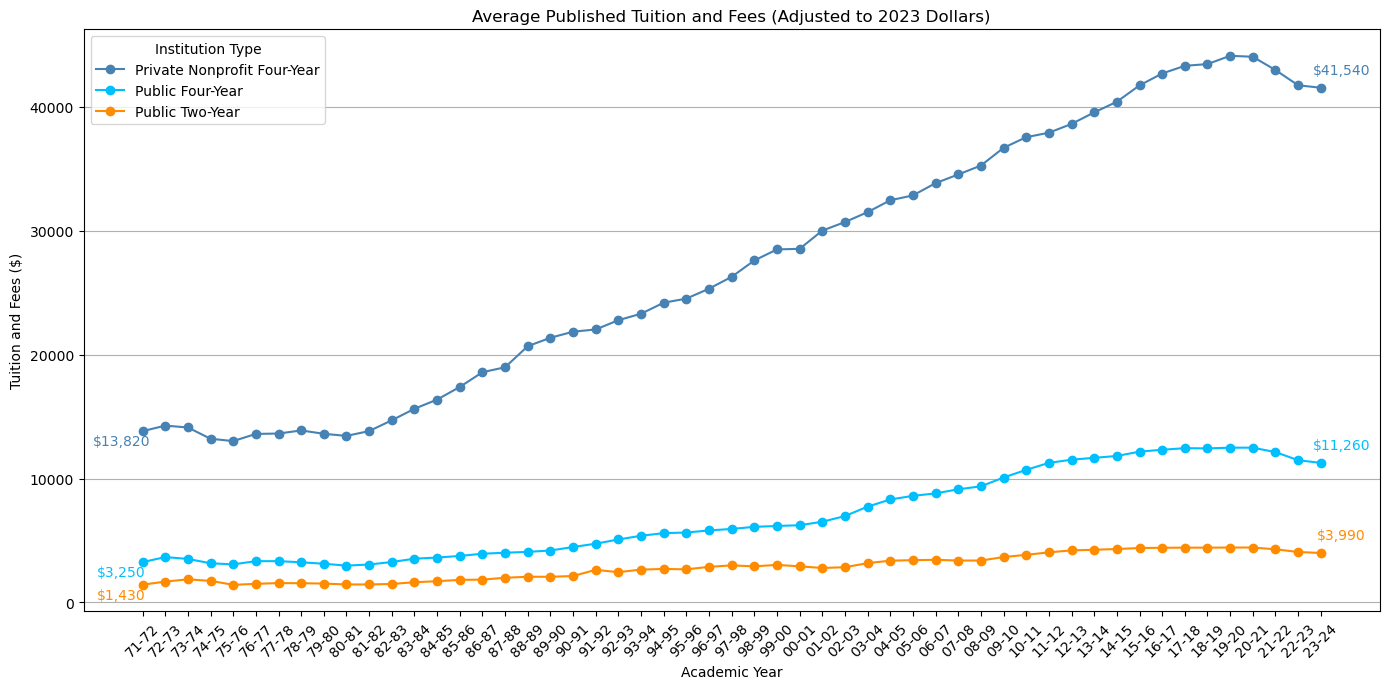

In [12]:
# Create the line chart
plt.figure(figsize=(14, 7))
colors = ["steelblue", "deepskyblue", "darkorange"]
for i, (column, color) in enumerate(zip(tuition_fees_data.columns[1:], colors)):
    plt.plot(tuition_fees_data['Academic Year'], tuition_fees_data[column], label=column, color=color, marker='o')
    # Annotate the first and last points
    plt.annotate(f'${tuition_fees_data[column].iloc[0]:,.0f}', (tuition_fees_data['Academic Year'].iloc[0], tuition_fees_data[column].iloc[0]),
                 textcoords="offset points", xytext=(-15,-10), ha='center', color=color)
    plt.annotate(f'${tuition_fees_data[column].iloc[-1]:,.0f}', (tuition_fees_data['Academic Year'].iloc[-1], tuition_fees_data[column].iloc[-1]),
                 textcoords="offset points", xytext=(15,10), ha='center', color=color)

# Adding chart title and labels
plt.title('Average Published Tuition and Fees (Adjusted to 2023 Dollars)')
plt.xlabel('Academic Year')
plt.ylabel('Tuition and Fees ($)')
plt.xticks(rotation=45)
plt.legend(title='Institution Type')
plt.grid(True, axis = 'y')
plt.gca().xaxis.grid(False)  # Disable vertical grid

plt.savefig('./output/Average Published Tuition and Fees (Adjusted to 2023 Dollars)')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Load the median household income dataset
income_file_path = './sample_data/median_household_income.csv'
median_income_df = pd.read_csv(income_file_path)

# Display the first few rows and the information about the dataframe
median_income_df.head()


,"Table with row headers in column A and column headers in rows 8 through 9, 56 through 57, 104 through 105, 152 through 153, 200 through 201, 248 through 249, 296 through 297, 337 through 338, 385 through 386, and 426 through 427",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Type of household\nand year,Number (thousands),Median Income in Current dollars,Median Income in 2022 dollars,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,"131,400","74,580","74,580",NaN,NaN
3,2021,"131,200","70,780","76,330",NaN,NaN
4,2020 (41),"129,200","68,010","76,660",NaN,NaN


In [14]:
# Cleaning the median income dataframe
# It appears the relevant data starts from row 2 and we need only the first two columns after renaming them properly
median_income_df = median_income_df.iloc[2:, [0, 2]]
median_income_df.columns = ['Year', 'Median Household Income']

# Converting year to datetime and income to numeric
median_income_df['Year'] = pd.to_datetime(median_income_df['Year'], errors='coerce')
median_income_df['Median Household Income'] = pd.to_numeric(median_income_df['Median Household Income'].str.replace(',', ''), errors='coerce')

# Dropping rows with any null values as they are likely errors or misformatted entries
median_income_df.dropna(inplace=True)

# Check cleaned data
median_income_df.head()

,Year,Median Household Income
2,2022-01-01,74580.0
3,2021-01-01,70780.0
5,2019-01-01,68700.0
6,2018-01-01,63180.0
8,2017-01-01,61370.0


In [15]:
# Ensure the 'Year' column in both dataframes is of type integer for proper merging
median_income_df['Year'] = median_income_df['Year'].dt.year
tuition_fees_df['Year'] = tuition_fees_df['Academic Year'].dt.year  # Extracting year for merging

# Merging the tuition fees data with the median household income data on the year
merged_df = pd.merge(tuition_fees_df, median_income_df, left_on='Year', right_on='Year', how='inner')

# Calculate the ratios
merged_df['Private Nonprofit Four-Year Ratio'] = merged_df['Private Nonprofit Four-Year.1'] / merged_df['Median Household Income']
merged_df['Public Four-Year Ratio'] = merged_df['Public Four-Year.1'] / merged_df['Median Household Income']

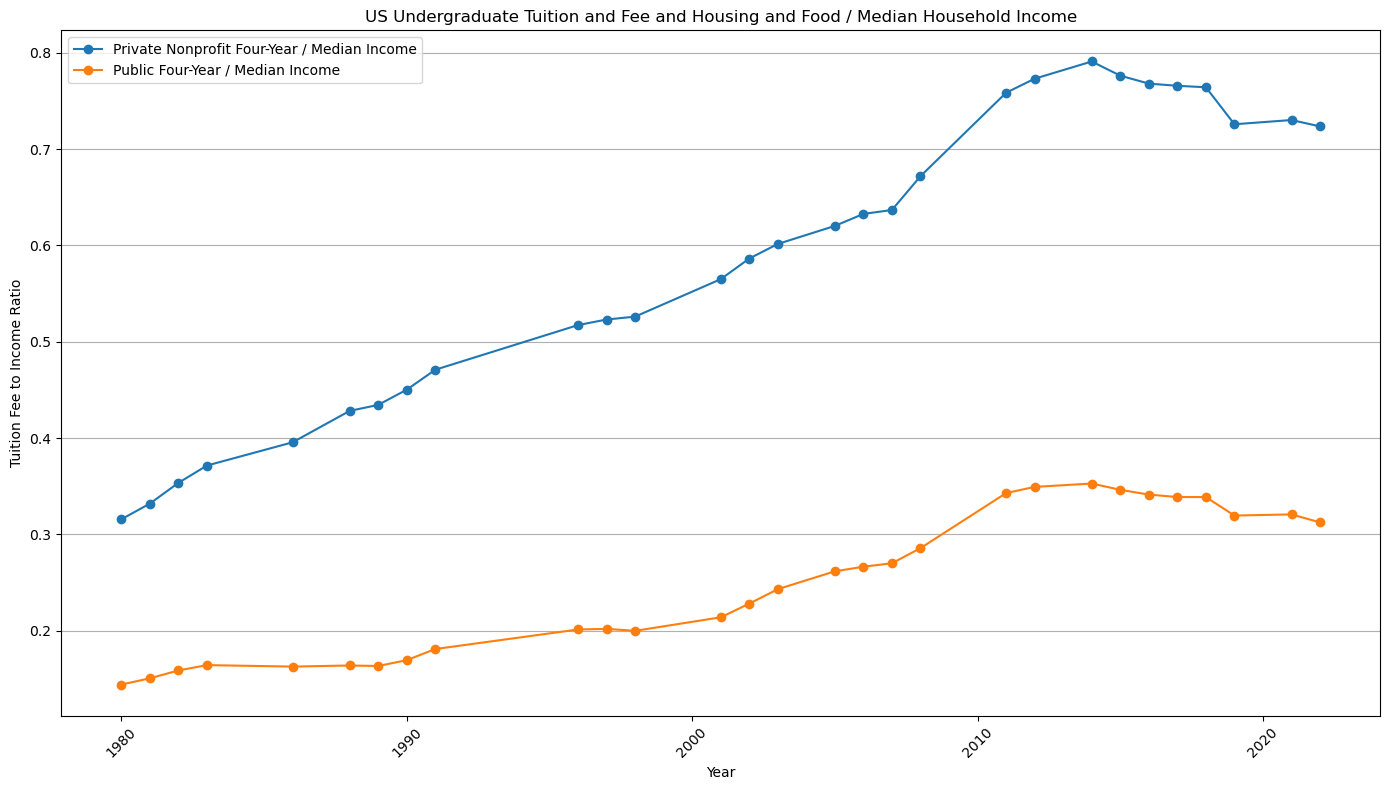

In [16]:
# Plotting the trends of these ratios
plt.figure(figsize=(14, 8))
plt.plot(merged_df['Year'], merged_df['Private Nonprofit Four-Year Ratio'], label='Private Nonprofit Four-Year / Median Income', marker='o')
plt.plot(merged_df['Year'], merged_df['Public Four-Year Ratio'], label='Public Four-Year / Median Income', marker='o')

plt.title('US Undergraduate Tuition and Fee and Housing and Food / Median Household Income')
plt.xlabel('Year')
plt.ylabel('Tuition Fee to Income Ratio')
plt.legend()
plt.grid(True, axis = 'y')

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Ratio of US Undergraduate Tuition and Fee and Housing and Food and Median Household Income.jpg')

plt.show()


In [17]:
# Load the new data file
inflation_adjusted_tuition_path = './sample_data/Inflation Adjusted published Tuition and fees.csv'
inflation_adjusted_tuition_data = pd.read_csv(inflation_adjusted_tuition_path)

# Display the first few rows of the dataframe to understand its structure
inflation_adjusted_tuition_data.head()

,Unnamed: 0,Private Nonprofit Four-Year,Public Four-Year In-State,Public Two-Year In-District
0,93-94,1.00,1.00,1.00
1,94-95,1.04,1.04,1.02
2,95-96,1.05,1.05,1.01
3,96-97,1.09,1.08,1.08
4,97-98,1.13,1.10,1.13


In [18]:
#rename the columns
inflation_adjusted_tuition_data = inflation_adjusted_tuition_data.rename(columns = {"Public Four-Year In-State": "Public Four-Year", 'Public Two-Year In-District':'Public Two-Year'})

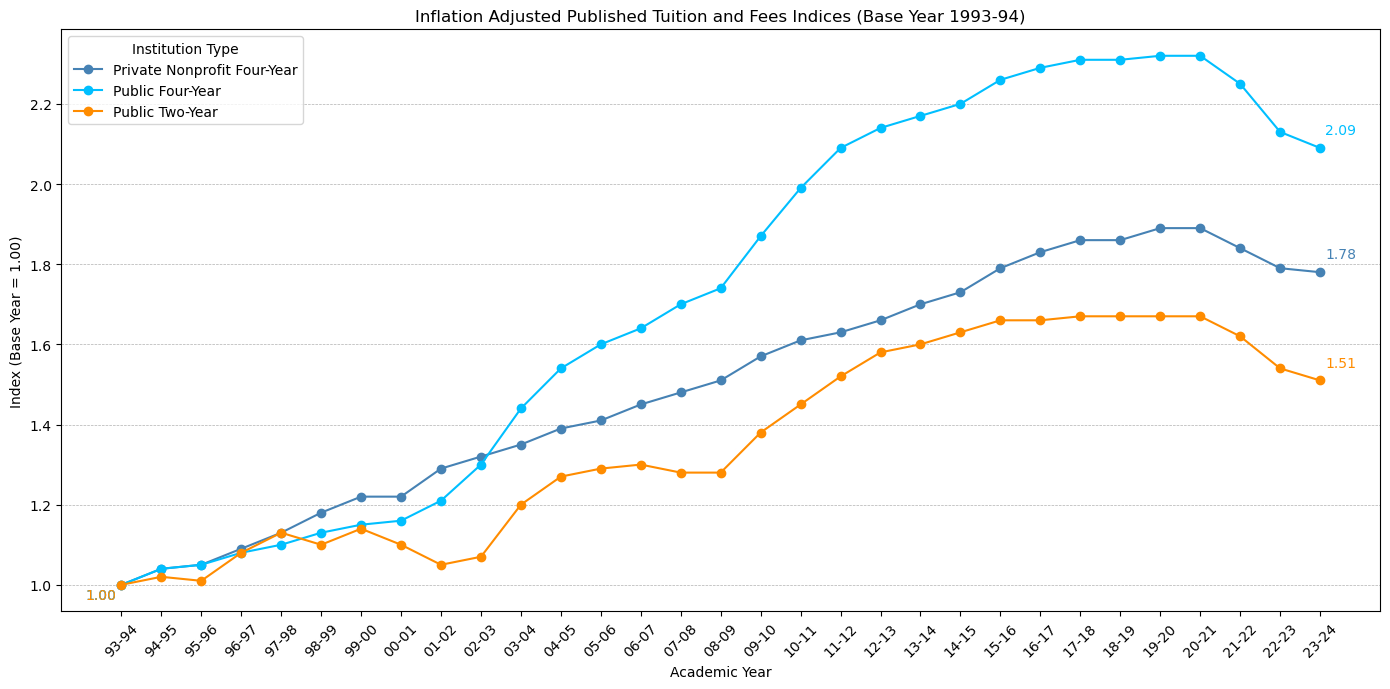

In [19]:
# Create the line chart
plt.figure(figsize=(14, 7))
colors = ["steelblue", "deepskyblue", "darkorange"]
labels = ['Private Nonprofit Four-Year', 'Public Four-Year', 'Public Two-Year']

for i, (column, color) in enumerate(zip(labels, colors)):
    plt.plot(inflation_adjusted_tuition_data['Unnamed: 0'], inflation_adjusted_tuition_data[column], label=column, color=color, marker='o')
    # Annotate the first and last points
    plt.annotate(f'{inflation_adjusted_tuition_data[column].iloc[0]:.2f}', (inflation_adjusted_tuition_data['Unnamed: 0'].iloc[0], inflation_adjusted_tuition_data[column].iloc[0]),
                 textcoords="offset points", xytext=(-15,-10), ha='center', color=color)
    plt.annotate(f'{inflation_adjusted_tuition_data[column].iloc[-1]:.2f}', (inflation_adjusted_tuition_data['Unnamed: 0'].iloc[-1], inflation_adjusted_tuition_data[column].iloc[-1]),
                 textcoords="offset points", xytext=(15,10), ha='center', color=color)

# Adding chart title and labels
plt.title('Inflation Adjusted Published Tuition and Fees Indices (Base Year 1993-94)')
plt.xlabel('Academic Year')
plt.ylabel('Index (Base Year = 1.00)')
plt.xticks(rotation=45)
plt.legend(title='Institution Type',)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.grid(False)  # Disable vertical grid

plt.savefig('./output/Inflation Adjusted Published Tuition and Fees Indices (Base Year 1993-94).jpg')

# Show the plot
plt.tight_layout()
plt.show()


- **Private Nonprofit Four-Year** Institutions show a steady increase in tuition fees over the years.
- **Public Four-Year** In-State also shows an upward trend, though it tends to be less steep than private institutions.
- **Public Two-Year** In-District fees fluctuate but generally follow an increasing trend similar to the other institution types.

In [20]:
# Load the new data file
enrollment_data_path = './sample_data/PostSecondary Fall Enrollments (In Millions) by Attendance Status and Level of Enrollment.csv'
enrollment_data = pd.read_csv(enrollment_data_path)

# Display the first few rows of the dataframe to understand its structure
enrollment_data.head()

,Unnamed: 0,Full-Time Undergraduate,Part-Time Undergraduate,All Graduate,Total,Unnamed: 5,Full-Time Undergraduate.1,Part-Time Undergraduate.1,All Graduate.1
0,2001,"8,290,890","5,377,171","2,212,327","15,880,388",NaN,52%,34%,14%
1,2002,"8,698,741","5,511,249","2,354,453","16,564,443",NaN,53%,33%,14%
2,2003,"9,002,720","5,427,328","2,426,215","16,856,263",NaN,53%,32%,14%
3,2004,"9,169,834","5,439,659","2,488,193","17,097,686",NaN,54%,32%,15%
4,2005,"9,352,096","5,474,217","2,521,220","17,347,533",NaN,54%,32%,15%


In [21]:
# Data cleanup: Remove commas from numbers and convert to integers
for column in ['Full-Time Undergraduate', 'Part-Time Undergraduate', 'All Graduate']:
    enrollment_data[column] = enrollment_data[column].replace(',', '', regex=True).astype(int)

# Prepare data for stacked bar chart
years = enrollment_data['Unnamed: 0']
full_time_undergrad = enrollment_data['Full-Time Undergraduate'] / 1e6  # Convert to millions
part_time_undergrad = enrollment_data['Part-Time Undergraduate'] / 1e6  # Convert to millions
all_graduate = enrollment_data['All Graduate'] / 1e6  # Convert to millions

# Calculate cumulative heights for annotations
cumulative_full_time = full_time_undergrad
cumulative_part_time = cumulative_full_time + part_time_undergrad

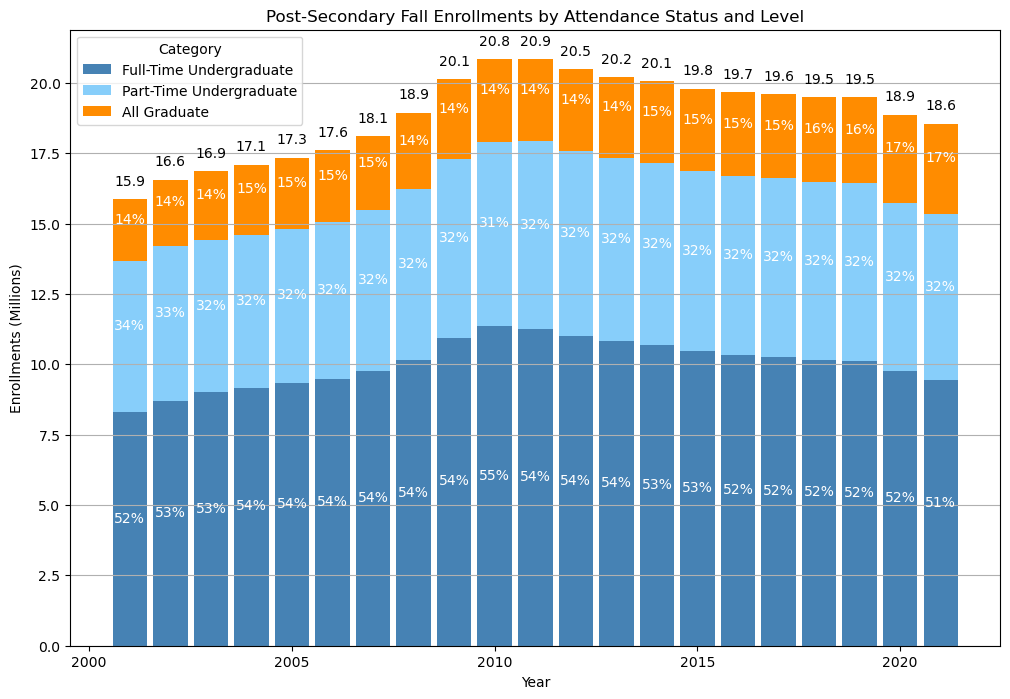

In [22]:
# Plotting with adjustment for total enrollments annotation
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.85

# Colors as specified
colors = ["steelblue", "lightskyblue", "darkorange"]

# Stacked bar chart
ax.bar(years, full_time_undergrad, color=colors[0], label='Full-Time Undergraduate', width=bar_width)
ax.bar(years, part_time_undergrad, bottom=full_time_undergrad, color=colors[1], label='Part-Time Undergraduate', width=bar_width)
ax.bar(years, all_graduate, bottom=cumulative_part_time, color=colors[2], label='All Graduate', width=bar_width)

# Adding annotations for percentages and total enrollments
for idx, year in enumerate(years):
    ax.annotate(f'{enrollment_data["Full-Time Undergraduate.1"][idx]}', (year, cumulative_full_time[idx]/2),
                textcoords="offset points", xytext=(0, 5), ha='center', color='white')
    ax.annotate(f'{enrollment_data["Part-Time Undergraduate.1"][idx]}', (year, (cumulative_full_time[idx] + part_time_undergrad[idx]/2)),
                textcoords="offset points", xytext=(0, 5), ha='center', color='white')
    ax.annotate(f'{enrollment_data["All Graduate.1"][idx]}', (year, (cumulative_part_time[idx] + all_graduate[idx]/2)),
                textcoords="offset points", xytext=(0, 5), ha='center', color='white')

    # Format the total enrollments to display in millions with one decimal place
    total_millions = int(enrollment_data['Total'][idx].replace(',', '')) / 1e6
    ax.annotate(f'{total_millions:.1f}', (year, cumulative_part_time[idx] + all_graduate[idx]),
                textcoords="offset points", xytext=(0, 10), ha='center', color='black')

# Labels, title, and grid
ax.set_xlabel('Year')
ax.set_ylabel('Enrollments (Millions)')
ax.set_title('Post-Secondary Fall Enrollments by Attendance Status and Level')
ax.legend(title='Category')
ax.yaxis.grid(True)  # Enable the Y-axis grid lines
ax.xaxis.grid(False) # Disable the X-axis grid lines

plt.savefig('./Trends of Post-Secondary Fall Enrollments by Attendance Status and Level.jpg')

plt.show()


1. **Growing Total Enrollments:** There's a clear upward trend in total enrollments over the years. This suggests an increasing demand for post-secondary education, which could be influenced by factors such as the growing importance of higher education in securing employment and the expansion of educational offerings.
2. **Dominance of Full-Time Undergraduate Enrollment:** Full-Time Undergraduate students consistently make up the largest portion of the enrollment. This group’s share seems to be stable or slightly growing as a percentage of total enrollment, highlighting a strong preference or need for traditional full-time study formats.
3. **Part-Time Undergraduate Enrollment:** This category, while significant, remains smaller compared to full-time enrollments. The relatively stable proportion of part-time students might reflect the balancing act many students face between education, work, and other responsibilities.
4. **Graduate Enrollment:** While smaller in comparison, the graduate enrollment segment shows a steady presence. The slight increases could indicate a steady interest in advanced degrees, which are often pursued to specialize further in a profession or transition into academic and research-oriented careers.
5. **Implications for Policy and Planning:** Understanding these trends is crucial for educational institutions and policymakers. For example, the increasing total enrollment numbers could necessitate expanded facilities and resources. The substantial proportion of full-time undergraduates might influence campus services, housing, and scheduling decisions. Similarly, the consistent presence of part-time and graduate students requires tailored support services, flexible course offerings, and possibly online education options to accommodate diverse needs.

In [23]:
# Load the CSV file to examine its contents
data = pd.read_csv('./sample_data/employ_rate.csv')
data.head()

,Unnamed: 0,1975,1980,1985,1990,1995,2000,2005,2010,2013,2015,2019,2020,2021,2022,2023
0,"25 to 64 years old, all education levels",65.8,70.2,71.6,75.0,75.5,77.7,75.0,71.5,72.1,73.1,75.6,74.7,72.9,75.8,76.1
1,Less than high school completion,55.3,55.5,53.1,54.9,53.8,57.8,57.2,52.1,53.2,54.7,56.1,55.1,52.1,56.2,57.6
2,High school completion,65.7,70.4,70.7,74.4,73.3,75.5,71.5,67.0,66.7,67.3,69.9,67.8,65.4,69.3,69.1
3,"Some college, no bachelor's degree",71.7,76.1,77.8,80.2,79.5,80.7,77.7,72.7,73.1,74.1,76.0,74.6,72.5,75.7,75.9
4,Bachelor's or higher degree,82.5,84.5,85.6,86.7,86.5,86.4,83.7,81.6,81.9,82.8,84.3,83.6,82.6,84.5,84.7


In [24]:
# Clean up the data by renaming columns and setting proper indices
data.columns = data.columns.str.strip()
data['Education Level'] = data['Unnamed: 0'].str.strip()
data.set_index('Education Level', inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)

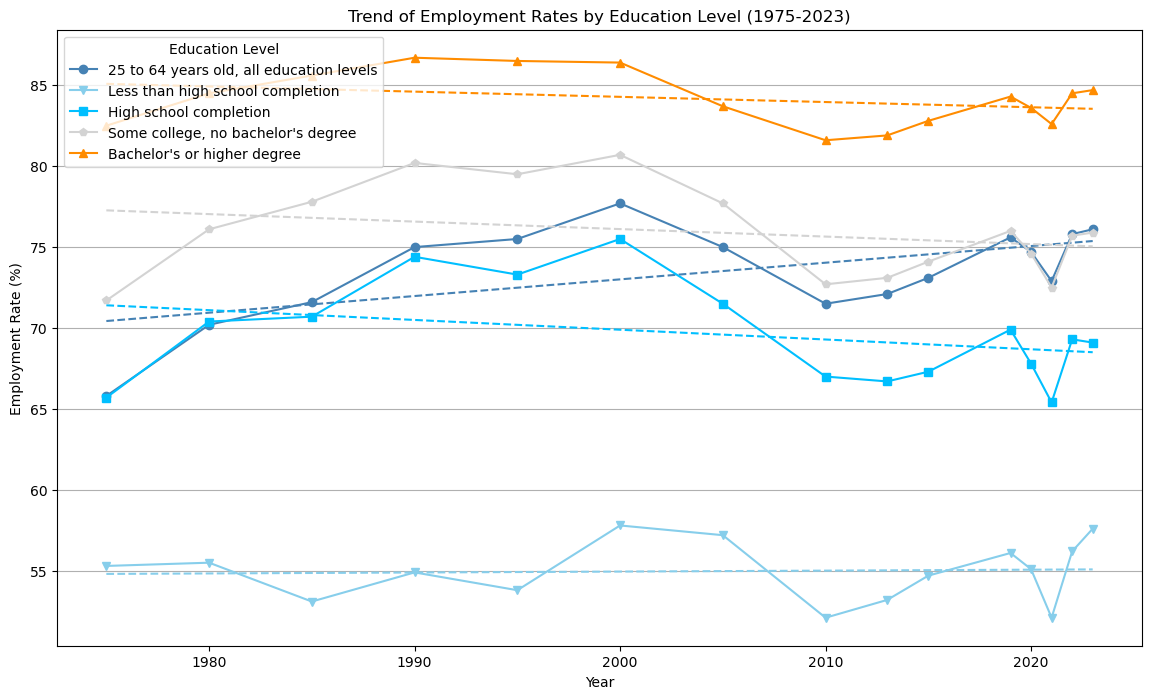

In [25]:

# Plotting
plt.figure(figsize=(14, 8))
colors = ['steelblue', 'skyblue', 'deepskyblue', 'lightgrey', 'darkorange']
markers = ['o', 'v', 's', 'p', '^']
for (level, color, marker) in zip(data.index, colors, markers):
    years = data.columns.astype(int)
    values = data.loc[level]
    plt.plot(years, values, label=level, marker=marker, color=color)

    # Fit a linear regression model for trend line
    z = np.polyfit(years, values, 1)
    p = np.poly1d(z)
    plt.plot(years, p(years), linestyle='--', color=color)

plt.title('Trend of Employment Rates by Education Level (1975-2023)')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Education Level')
plt.grid(True, axis = 'y')

plt.savefig('./output/Trend of Employment Rates by Education Level (1975-2023).jpg')
plt.show()

In [26]:
unemployment_data = pd.read_csv('./sample_data/umemployment_rate.csv')
unemployment_data.head()

,Unnamed: 0,1975,1980,1985,1990,1995,2000,2005,2010,2013,2015,2019,2020,2021,2022,2023
0,"25 to 64 years old, all education levels",6.8,5.0,6.1,3.6,4.8,3.3,4.4,9.1,6.6,4.7,3.2,4.5,5.6,3.2,3.3
1,Less than high school completion,10.5,8.4,11.4,7.7,10.0,7.9,9.0,16.8,12.7,9.2,6.5,8.3,9.9,6.5,6.5
2,High school completion\2\,6.8,5.1,6.9,3.8,5.2,3.8,5.5,12.1,8.7,6.2,4.0,6.0,7.4,4.6,4.4
3,"Some college, no bachelor's degree\3\",5.5,4.3,4.7,3.1,4.5,3.0,4.2,8.8,6.5,4.9,3.5,4.7,6.4,3.2,3.4
4,Bachelor's or higher degree,2.4,1.9,2.4,1.7,2.5,1.5,2.3,4.7,3.8,2.4,1.9,2.9,3.6,1.8,2.1


In [27]:
# Clean up the unemployment data by renaming columns and setting proper indices
unemployment_data.columns = unemployment_data.columns.str.strip()
unemployment_data['Education Level'] = unemployment_data['Unnamed: 0'].str.strip()
unemployment_data.set_index('Education Level', inplace=True)
unemployment_data.drop(columns=['Unnamed: 0'], inplace=True)



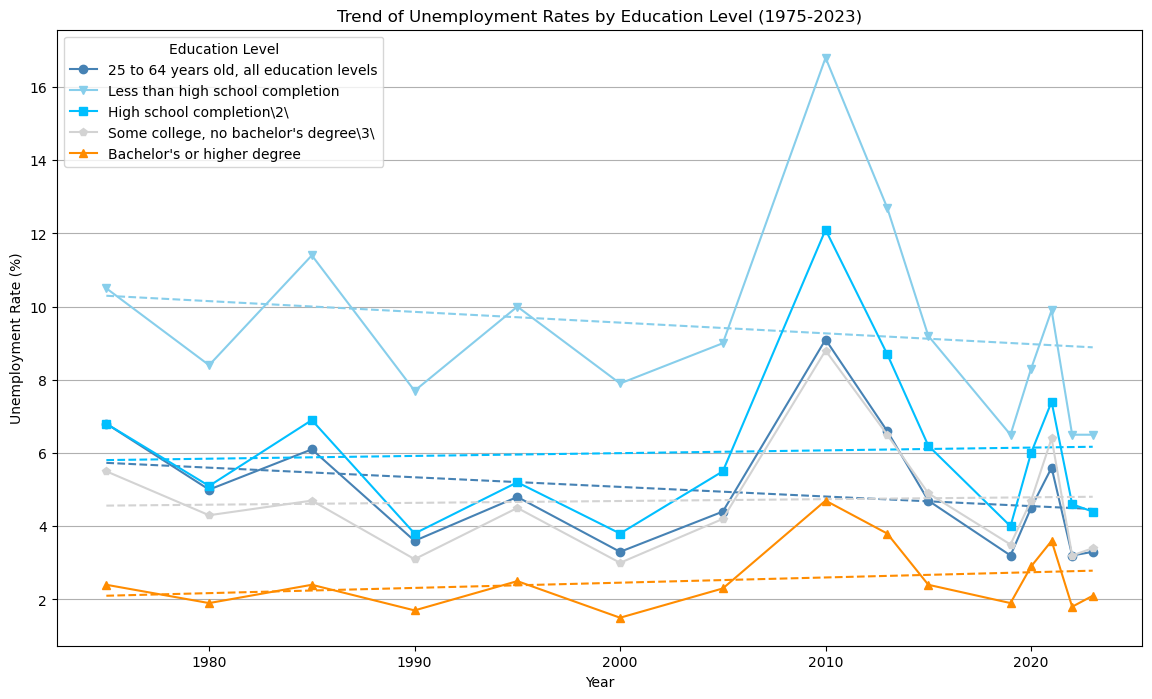

In [28]:


# Plotting
plt.figure(figsize=(14, 8))
colors = ['steelblue', 'skyblue', 'deepskyblue', 'lightgrey', 'darkorange']
markers = ['o', 'v', 's', 'p', '^']
for (level, color, marker) in zip(unemployment_data.index, colors, markers):
    years = unemployment_data.columns.astype(int)
    values = unemployment_data.loc[level]
    plt.plot(years, values, label=level, marker=marker, color=color)

    # Fit a linear regression model for trend line
    z = np.polyfit(years, values, 1)
    p = np.poly1d(z)
    plt.plot(years, p(years), linestyle='--', color=color)

plt.title('Trend of Unemployment Rates by Education Level (1975-2023)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Education Level')
plt.grid(True, axis = 'y')

plt.savefig('./output/Trend of Unemployment Rates by Education Level (1975-2023).jpg')
plt.show()


In [29]:
# Load the data to see its structure
data_path = './sample_data/Average Aid per full-time Equivalent (FTE) Undergraduate Student in 2022 Dollars.csv'
ug_student_aid_data = pd.read_csv(data_path)

# Display the first few rows and the structure of the data
ug_student_aid_data.head()

,Academic Year,Average Grant Aid,Average Federal Loans,Average Other Aid,Total
0,02-03,"$5,900","$4,500",$910,"$11,310"
1,03-04,"$6,230","$4,940",$950,"$12,120"
2,04-05,"$6,330","$5,180",$950,"$12,460"
3,05-06,"$6,310","$5,210",$930,"$12,450"
4,06-07,"$6,470","$5,060",$910,"$12,440"


In [30]:
# Remove the '$' and ',' characters and convert the strings to floats
columns_to_convert = ['Average Grant Aid', 'Average Federal Loans', 'Average Other Aid', 'Total']
# Strip extra spaces from column names
ug_student_aid_data.columns = ug_student_aid_data.columns.str.strip()

In [31]:
for column in columns_to_convert:
    ug_student_aid_data[column] = ug_student_aid_data[column].replace('[\$,]', '', regex=True).astype(float)

# Verify the corrected data
ug_student_aid_data.head()

,Academic Year,Average Grant Aid,Average Federal Loans,Average Other Aid,Total
0,02-03,5900.0,4500.0,910.0,11310.0
1,03-04,6230.0,4940.0,950.0,12120.0
2,04-05,6330.0,5180.0,950.0,12460.0
3,05-06,6310.0,5210.0,930.0,12450.0
4,06-07,6470.0,5060.0,910.0,12440.0


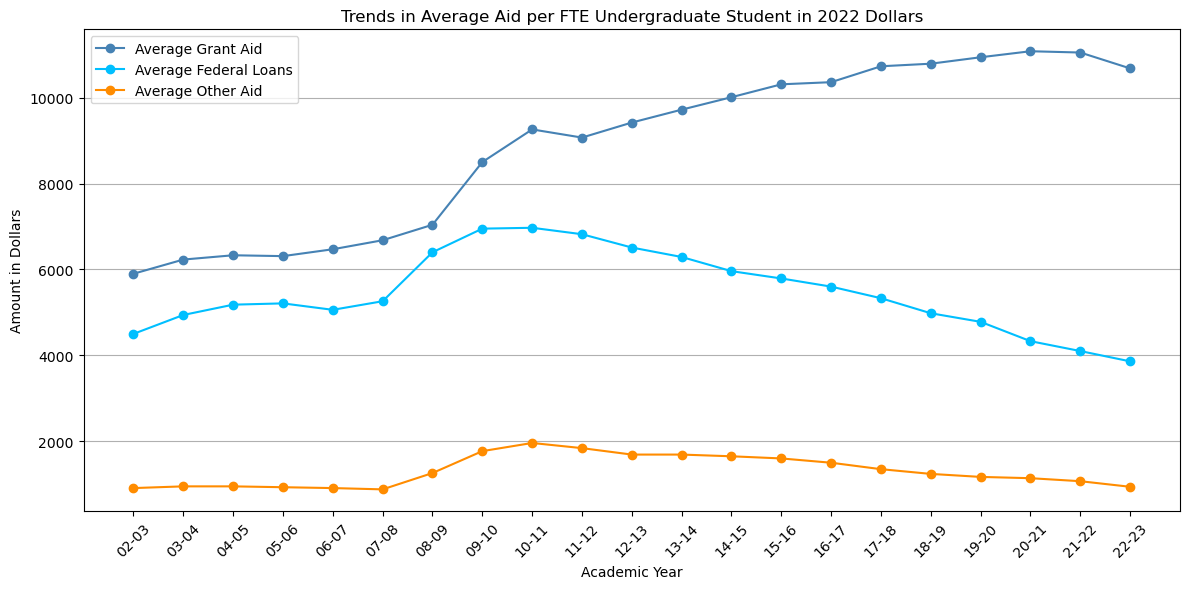

In [32]:
# Setting up the colors according to user preference
colors = {"Average Grant Aid": "steelblue", "Average Federal Loans": "deepskyblue", "Average Other Aid": "darkorange"}

# Plotting the data
plt.figure(figsize=(12, 6))
for column, color in colors.items():
    plt.plot(ug_student_aid_data['Academic Year'], ug_student_aid_data[column], label=column, color=color, marker='o')

plt.title('Trends in Average Aid per FTE Undergraduate Student in 2022 Dollars')
plt.xlabel('Academic Year')
plt.ylabel('Amount in Dollars')
plt.legend()
plt.grid(True, axis = 'y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Trends in Average Aid per FTE Undergraduate Student in 2022 Dollars.jpg')

# Show the plot
plt.show()


- Average Grant Aid (in royalblue) shows a general upward trend, indicating increasing support through grants.
- Average Federal Loans (in deepskyblue) also show a mostly increasing trend but with slight fluctuations, which could reflect changes in policy or economic conditions affecting loan uptake.
- Average Other Aid (in orange) remains relatively stable, with minor changes over the years.

In [33]:
# Load the new data for graduate students
grad_data_path = './sample_data/Average Aid Per full-time Equivalent (FTE) Graduate Student in 2022 Dollars.csv'
g_student_aid_data = pd.read_csv(grad_data_path)

# Strip extra spaces from column names
g_student_aid_data.columns = g_student_aid_data.columns.str.strip()

# Display the first few rows and the structure of the data
g_student_aid_data.head()


,Academic Year,Average Grant Aid,Average Federal Loans,Average Other Aid,Total
0,02-03,"$6,650","$13,900",$960,"$21,510"
1,03-04,"$6,670","$15,080",$990,"$22,740"
2,04-05,"$7,110","$15,820","$1,030","$23,960"
3,05-06,"$7,670","$15,970","$1,060","$24,700"
4,06-07,"$8,210","$17,380","$1,070","$26,660"


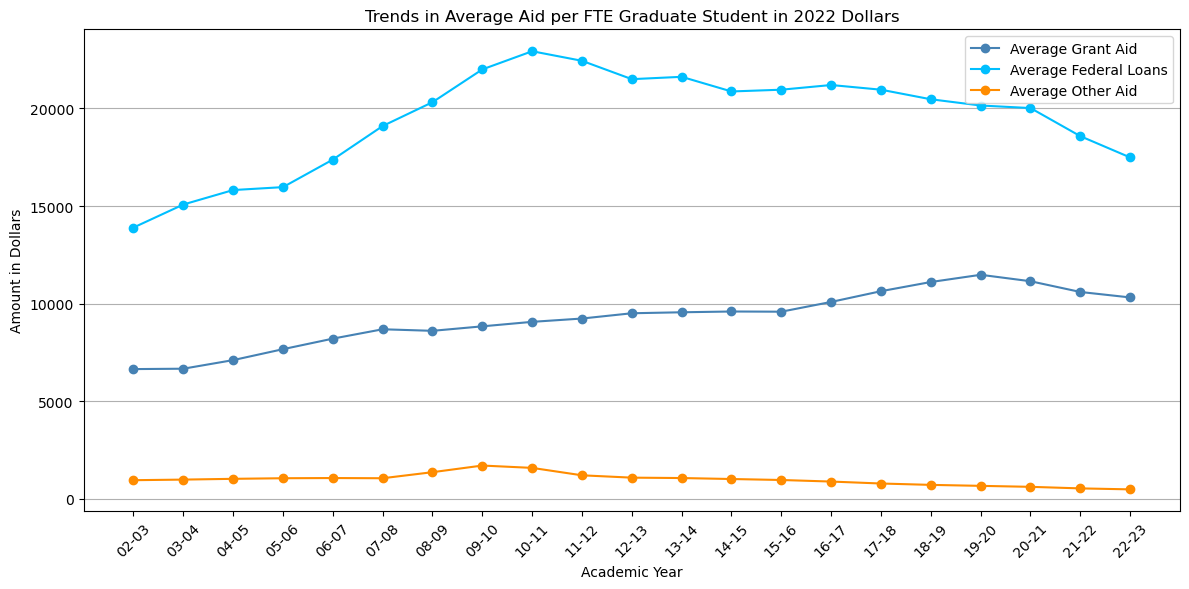

In [34]:
# Convert the monetary values from string to numeric for graduate data
columns_to_convert_grad = ['Average Grant Aid', 'Average Federal Loans', 'Average Other Aid', 'Total']

for column in columns_to_convert_grad:
    g_student_aid_data[column] = g_student_aid_data[column].replace('[\$,]', '', regex=True).astype(float)

# Setting up the colors according to user preference
colors = {"Average Grant Aid": "steelblue", "Average Federal Loans": "deepskyblue", "Average Other Aid": "darkorange"}
   
# Plotting the graduate student aid data
plt.figure(figsize=(12, 6))
for column, color in colors.items():
    plt.plot(g_student_aid_data['Academic Year'], g_student_aid_data[column], label=column, color=color, marker='o')

plt.title('Trends in Average Aid per FTE Graduate Student in 2022 Dollars')
plt.xlabel('Academic Year')
plt.ylabel('Amount in Dollars')
plt.legend()
plt.grid(True, axis = 'y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Trends in Average Aid per FTE Graduate Student in 2022 Dollars.jpg')

# Show the plot
plt.show()


- Average Grant Aid (in royalblue) shows a consistent increase, indicating a growing provision of grant-based support for graduate students.
- Average Federal Loans (in deepskyblue) show a more pronounced upward trend, suggesting an increasing reliance on loans among graduate students.
- Average Other Aid (in orange) also increases slightly but remains much less significant compared to grants and loans.

In [35]:
# Load the new data for the composition of total aid and nonfederal loans
composition_data_path = './sample_data/Composition of Total Aid and Nonfederal Loans 2002-03 to 2022-23 .csv'
ug_composition_aid_nonfederal_loan = pd.read_csv(composition_data_path)

# Strip extra spaces from column names
ug_composition_aid_nonfederal_loan.columns = ug_composition_aid_nonfederal_loan.columns.str.strip()

# Display the first few rows and the structure of the data
ug_composition_aid_nonfederal_loan.head()


,Undergraduate,02-03,03-04,04-05,05-06,06-07,07-08,08-09,09-10,10-11,...,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23
0,Grants,48%,47%,45%,44%,44%,44%,45%,47%,49%,...,53%,54%,55%,56%,58%,60%,60%,63%,64%,64%
1,Loans,44%,46%,48%,49%,49%,50%,47%,43%,40%,...,38%,37%,36%,36%,34%,34%,33%,30%,30%,30%
2,Other,7%,7%,7%,6%,6%,6%,8%,10%,10%,...,9%,9%,9%,8%,7%,7%,6%,7%,6%,6%


In [36]:
# Load the new data for composition of total aid and nonfederal loans
ug_composition_data_path = './sample_data/Composition of Total Aid and Nonfederal Loans 2002-03 to 2022-23 .csv'
ug_composition_aid_nonfederal_loan = pd.read_csv(ug_composition_data_path)

# Strip extra spaces from column names
ug_composition_aid_nonfederal_loan.columns = ug_composition_aid_nonfederal_loan.columns.str.strip()

# Display the first few rows and the structure of the data
ug_composition_aid_nonfederal_loan.head()


,Undergraduate,02-03,03-04,04-05,05-06,06-07,07-08,08-09,09-10,10-11,...,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23
0,Grants,48%,47%,45%,44%,44%,44%,45%,47%,49%,...,53%,54%,55%,56%,58%,60%,60%,63%,64%,64%
1,Loans,44%,46%,48%,49%,49%,50%,47%,43%,40%,...,38%,37%,36%,36%,34%,34%,33%,30%,30%,30%
2,Other,7%,7%,7%,6%,6%,6%,8%,10%,10%,...,9%,9%,9%,8%,7%,7%,6%,7%,6%,6%


In [37]:
# Remove '%' and convert strings to floats
for column in ug_composition_aid_nonfederal_loan.columns[1:]:  # Skip the first column which is categorical
    ug_composition_aid_nonfederal_loan[column] = ug_composition_aid_nonfederal_loan[column].replace('%', '', regex=True).astype(float)

# Transpose the data for easier plotting
ug_composition_aid_transposed = ug_composition_aid_nonfederal_loan.set_index('Undergraduate').transpose()

# Check the transformed and transposed data
ug_composition_aid_transposed.head()


Undergraduate,Grants,Loans,Other
02-03,48.0,44.0,7.0
03-04,47.0,46.0,7.0
04-05,45.0,48.0,7.0
05-06,44.0,49.0,6.0
06-07,44.0,49.0,6.0


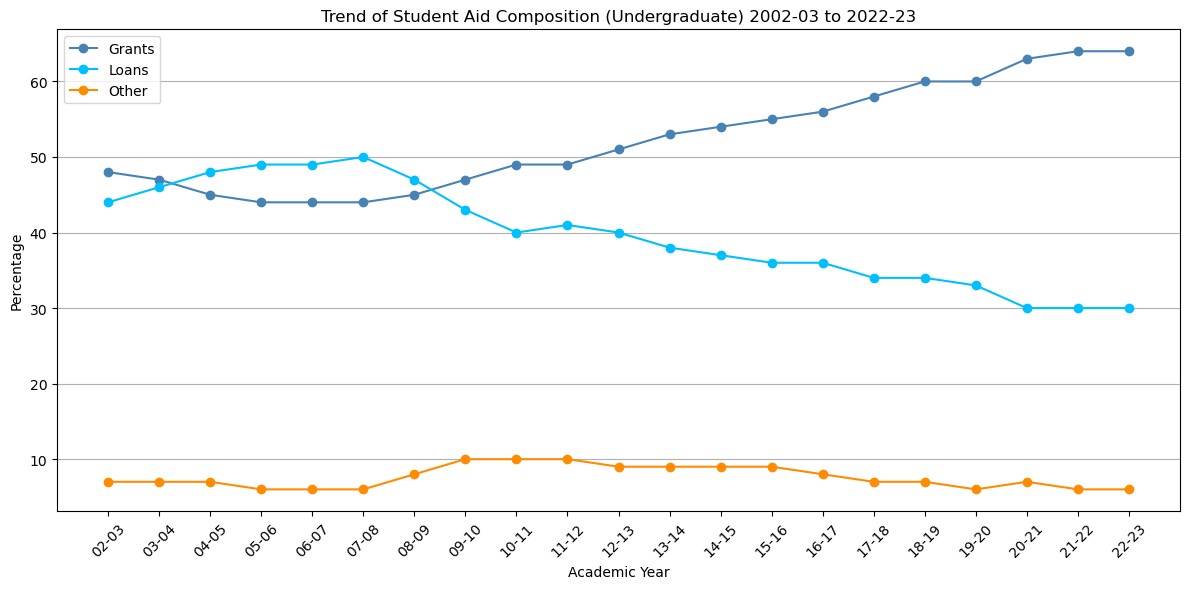

In [38]:


# Define new colors for this visualization
new_colors = {"Grants": "steelblue", "Loans": "deepskyblue", "Other": "darkorange"}

# Plotting the data
plt.figure(figsize=(12, 6))
for aid_type, color in new_colors.items():
    plt.plot(ug_composition_aid_transposed.index, ug_composition_aid_transposed[aid_type], label=aid_type, color=color, marker='o')

plt.title('Trend of Student Aid Composition (Undergraduate) 2002-03 to 2022-23')
plt.xlabel('Academic Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True, axis = 'y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Trend of Student Aid Composition (Undergraduate) 2002-03 to 2022-23.jpg')

# Show the plot
plt.show()


In [39]:
# Load the data into the specified variable
g_composition_data_path = './sample_data/Composition of Total Aid and Nonfederal Loans 2002-03 to 2022-23 (Graduate).csv'
g_composition_aid_nonfederal_loan = pd.read_csv(g_composition_data_path)

# Display the first few rows of the dataframe
g_composition_aid_nonfederal_loan.head()

,Graduate,02-03,03-04,04-05,05-06,06-07,07-08,08-09,09-10,10-11,...,13-14,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23
0,Grants,28%,27%,27%,28%,28%,28%,27%,26%,26%,...,29%,30%,30%,31%,32%,34%,35%,34%,35%,36%
1,Loans,68%,69%,70%,68%,68%,69%,68%,68%,69%,...,68%,67%,67%,67%,65%,64%,63%,64%,63%,63%
2,Other,4%,4%,4%,4%,4%,3%,4%,5%,5%,...,3%,3%,3%,3%,2%,2%,2%,2%,2%,2%


In [40]:
# Remove percentage signs and convert to float
for col in g_composition_aid_nonfederal_loan.columns[1:]:  # skip the first column
    g_composition_aid_nonfederal_loan[col] = g_composition_aid_nonfederal_loan[col].str.replace('%', '').astype(float)

# Transpose the dataframe for plotting
g_composition_aid_transposed = g_composition_aid_nonfederal_loan.set_index('Graduate').transpose()

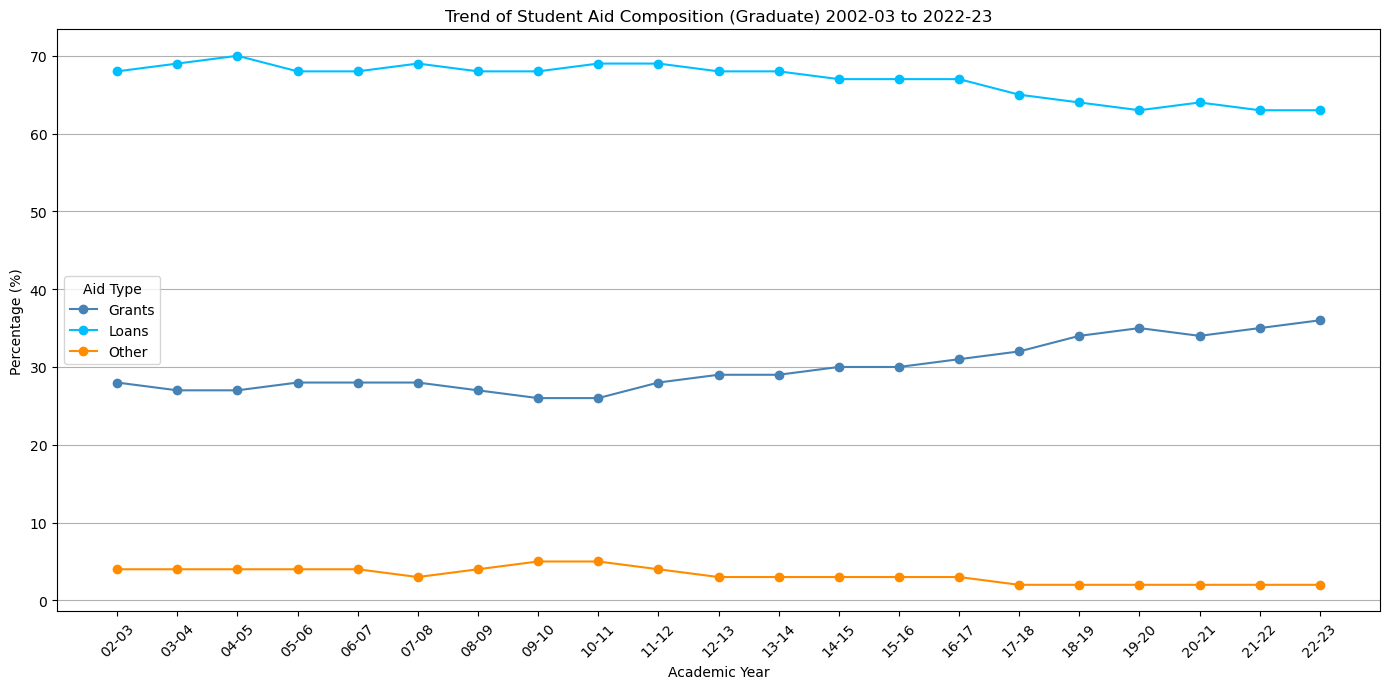

In [41]:
# Plotting
plt.figure(figsize=(14, 7))
for (column, color) in zip(g_composition_aid_transposed.columns, ["steelblue", "deepskyblue", "darkorange"]):
    plt.plot(g_composition_aid_transposed.index, g_composition_aid_transposed[column], label=column, color=color, marker='o')

plt.title('Trend of Student Aid Composition (Graduate) 2002-03 to 2022-23')
plt.xlabel('Academic Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.legend(title='Aid Type')
plt.tight_layout()

plt.savefig('./output/Trend of Student Aid Composition (Graduate) 2002-03 to 2022-23.jpg')

# Show the plot
plt.show()

- Grants have seen a gradual increase over the years, growing from 28% in 2002-03 to 36% in 2022-23. This suggests a trend toward more non-repayable financial aid being available for graduate students.
- Loans have consistently remained the largest component of aid, but interestingly, they have slightly decreased from 68% in 2002-03 to 63% in 2022-23. This might indicate a shift towards less reliance on borrowed money.
- Other types of aid have remained fairly constant but minimal, fluctuating slightly but remaining around 2% to 4% throughout the period.

In [42]:
# Load the new dataset
pell_grant_file_path = './sample_data/Total Pell Grant Expenditures and Number of Recipients.csv'
pell_grant_data = pd.read_csv(pell_grant_file_path)

# Display the first few rows of the dataframe to understand its structure
pell_grant_data.head()


,Unnamed: 0,Total Pell Expenditures (Billions),Number of Recipients (Millions)
0,1982-83,$7.3,2.5
1,1983-84,$8.2,2.8
2,1984-85,$8.6,2.7
3,1985-86,$9.8,2.8
4,1986-87,$9.2,2.7


In [43]:
# Data preparation
# Remove dollar signs and convert the expenditures column to float
pell_grant_data['Total Pell Expenditures (Billions)'] = pell_grant_data['Total Pell Expenditures (Billions)'].str.replace('$', '', regex=False).astype(float)



In [44]:
# Data preparation: Remove '$' sign from expenditures and convert to float
pell_grant_data['Total Pell Expenditures (Billions)'] = pell_grant_data['Total Pell Expenditures (Billions)'].replace('[\$,]', '', regex=True).astype(float)

- The **Total Pell Expenditures** show a general increase over the years, reflecting growth in the funding allocated to Pell Grants. This suggests a growing investment in financial aid for education.
- The **Number of Recipients** has varied over the years, but overall, it tends to follow a somewhat parallel trend to the expenditures, indicating that as more money is allocated, more students are able to benefit from the program.

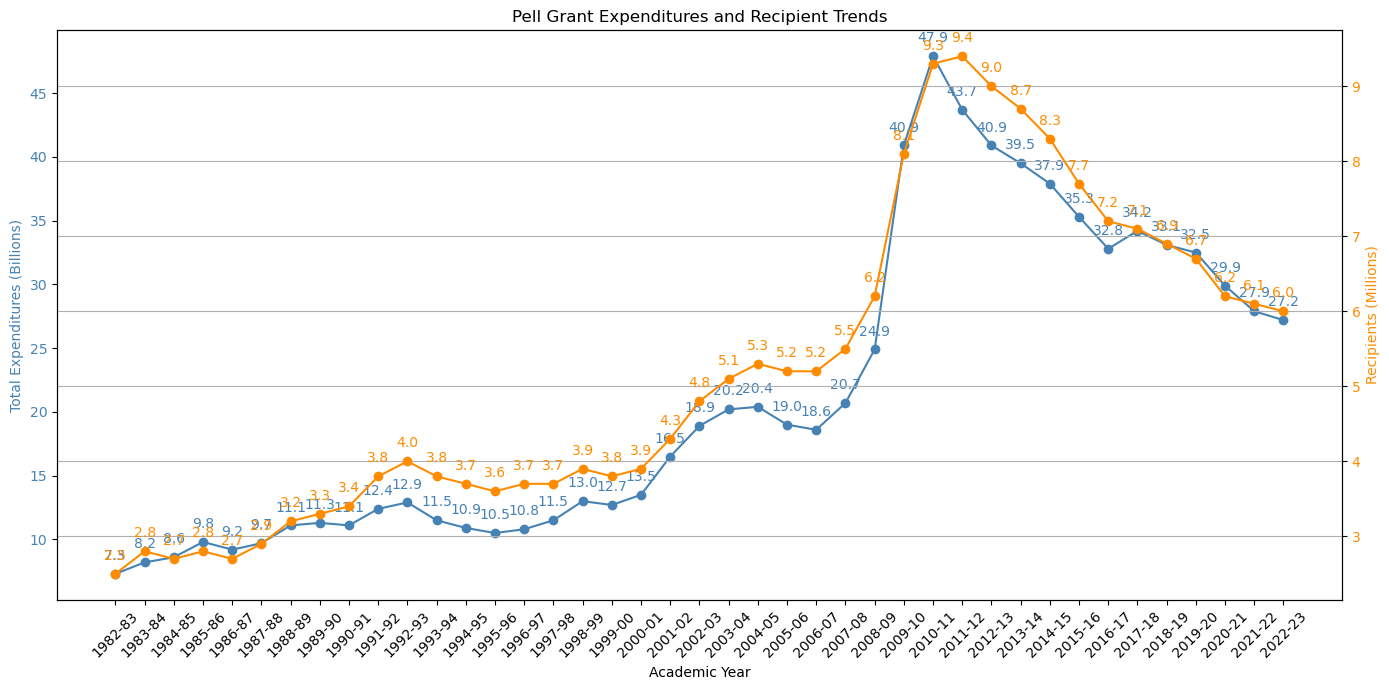

In [45]:
# Create the line chart with dual Y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# First Y-axis for expenditures
color = 'steelblue'
ax1.set_xlabel('Academic Year')
ax1.set_ylabel('Total Expenditures (Billions)', color=color)
ax1.plot(pell_grant_data['Unnamed: 0'], pell_grant_data['Total Pell Expenditures (Billions)'], color=color, marker='o', label='Total Expenditures (Billions)')
ax1.tick_params(axis='y', labelcolor=color)
for idx, value in enumerate(pell_grant_data['Total Pell Expenditures (Billions)']):
    ax1.annotate(f'{value}', (pell_grant_data['Unnamed: 0'][idx], value),
                 textcoords="offset points", xytext=(0,10), ha='center', color=color)

# Second Y-axis for number of recipients
ax2 = ax1.twinx()  
color = 'darkorange'
ax2.set_ylabel('Recipients (Millions)', color=color)
ax2.plot(pell_grant_data['Unnamed: 0'], pell_grant_data['Number of Recipients (Millions)'], color=color, marker='o', label='Recipients (Millions)')
ax2.tick_params(axis='y', labelcolor=color)
for idx, value in enumerate(pell_grant_data['Number of Recipients (Millions)']):
    ax2.annotate(f'{value}', (pell_grant_data['Unnamed: 0'][idx], value),
                 textcoords="offset points", xytext=(0,10), ha='center', color=color)

# Rotate x-axis labels to 45 degrees
ax1.tick_params(axis='x', rotation=45)
    
# Adding chart title and legend
plt.title('Pell Grant Expenditures and Recipient Trends')
fig.tight_layout()
plt.grid(True)

plt.savefig('./output/Pell Grant Expenditures and Recipient Trends.jpg')

# Show the plot
plt.show()


In [46]:
# Load the new data file
grant_aid_data_path = './sample_data/Percentage of First time full Time Undergraduate Student Receiving  Institutional Grant Aid.csv'
grant_aid_data = pd.read_csv(grant_aid_data_path)

# Display the first few rows of the dataframe to understand its structure
grant_aid_data.head()

,Unnamed: 0,Public Four-Year,Private Nonprofit Four-Year,Public Two-Year
0,2006-07,35%,73%,12%
1,2007-08,37%,74%,11%
2,2008-09,38%,76%,11%
3,2009-10,40%,77%,11%
4,2010-11,41%,78%,11%


In [47]:
# Data preparation: Convert percentage strings to floats
for column in grant_aid_data.columns[1:]:
    grant_aid_data[column] = grant_aid_data[column].str.rstrip('%').astype(float)


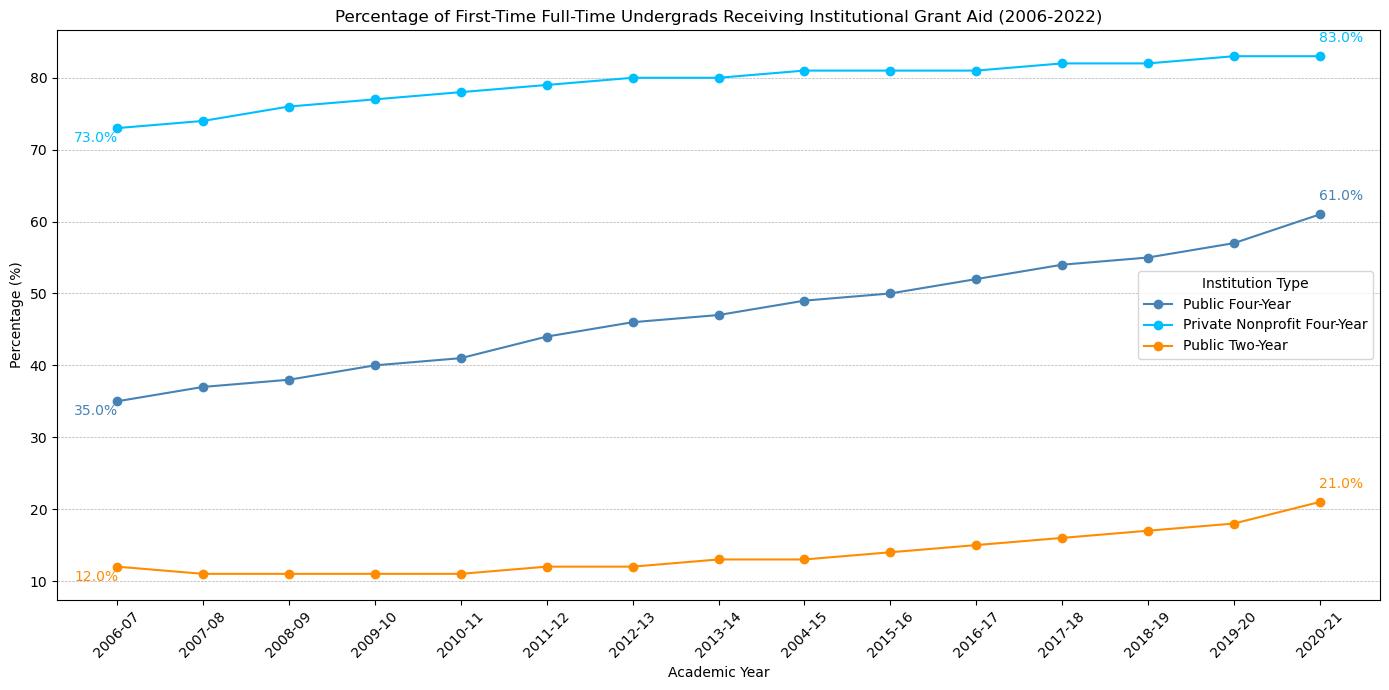

In [48]:
# Create the line chart
plt.figure(figsize=(14, 7))
colors = ["steelblue", "deepskyblue", "darkorange"]
for i, (column, color) in enumerate(zip(grant_aid_data.columns[1:], colors)):
    plt.plot(grant_aid_data['Unnamed: 0'], grant_aid_data[column], label=column, color=color, marker='o')
    # Annotate the first and last points
    plt.annotate(f'{grant_aid_data[column].iloc[0]}%', (grant_aid_data['Unnamed: 0'].iloc[0], grant_aid_data[column].iloc[0]),
                 textcoords="offset points", xytext=(-15,-10), ha='center', color=color)
    plt.annotate(f'{grant_aid_data[column].iloc[-1]}%', (grant_aid_data['Unnamed: 0'].iloc[-1], grant_aid_data[column].iloc[-1]),
                 textcoords="offset points", xytext=(15,10), ha='center', color=color)

# Adding chart title and labels
plt.title('Percentage of First-Time Full-Time Undergrads Receiving Institutional Grant Aid (2006-2022)')
plt.xlabel('Academic Year')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Institution Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.grid(False)  # Disable vertical grid

plt.savefig('./output/Percentage of First-Time Full-Time Undergrads Receiving Institutional Grant Aid (2006-2022).jpg')

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
# Load the data from the uploaded CSV file
file_path = './sample_data/PostsecondaryEnrollmentRatesofRecentHighSchoolGraduatesbyRace.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to get an overview of the data
data.head()

,Unnamed: 0,Asian,White,Black,Hispanic
0,1990,81%,62%,48%,52%
1,1991,81%,63%,49%,52%
2,1992,81%,64%,47%,52%
3,1993,82%,64%,50%,58%
4,1994,82%,64%,52%,55%


In [50]:
# Clean and convert percentage data for plotting
data_clean = data.copy()
data_clean['Asian'] = data_clean['Asian'].str.rstrip('%').astype('float')
data_clean['White'] = data_clean['White'].str.rstrip('%').astype('float')
data_clean['Black'] = data_clean['Black'].str.rstrip('%').astype('float')
data_clean['Hispanic'] = data_clean['Hispanic'].str.rstrip('%').astype('float')

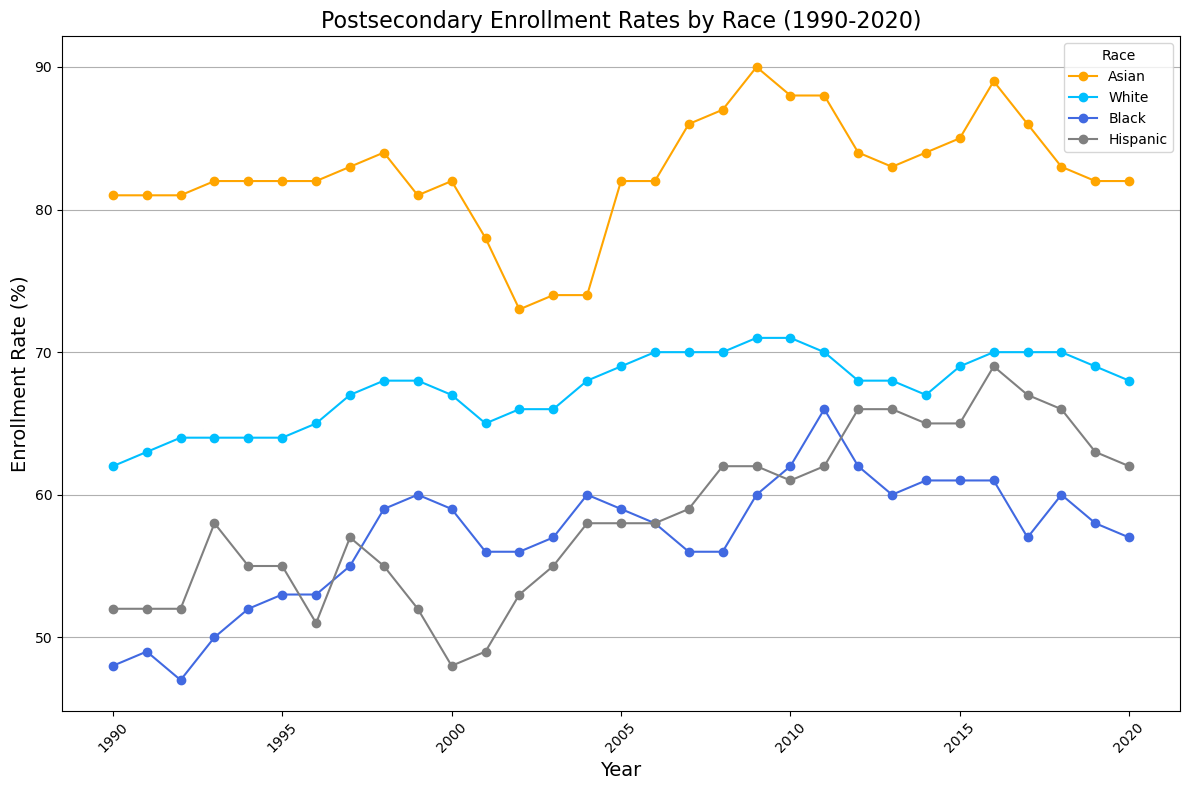

In [51]:


colors = {
    'Asian': 'orange',  # Orange
    'Black': 'royalblue',  # RoyalBlue
    'Hispanic': 'gray',  # Gray
    'White': 'deepskyblue'  # Deep Sky Blue
}

# Plotting the data again with the new colors
plt.figure(figsize=(12, 8))
for column in data_clean.columns[1:]:
    plt.plot(data_clean['Unnamed: 0'], data_clean[column], label=column, marker='o', color=colors[column])

plt.title('Postsecondary Enrollment Rates by Race (1990-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Enrollment Rate (%)', fontsize=14)
plt.legend(title='Race')
plt.grid(True, axis = 'y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Postsecondary Enrollment Rates by Race (1990-2020).jpg')

# Display the plot
plt.show()

All groups saw an increase in enrollment rates over the 30-year period, with Hispanics experiencing the largest increase at 10%, indicating a positive trend in access to higher education for this group.

## The gain from obtaining a higher educational degree

## The higher education brings you more than higher income.

In [52]:
# Let's load the new provided data to understand its structure and contents.
voting_file_path = './sample_data/VotingRatesAmongUSCitizensDuringPresidentialElections.csv'
voting_data = pd.read_csv(voting_file_path)

# Display the first few rows of the dataframe to get an overview of the data
voting_data.head()


,Education Level,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
0,Grades 9 to 11,65%,61%,52%,47%,47%,46%,44%,45%,37%,38%,40%,40%,38%,35%,41%
1,High School Diploma,76%,73%,65%,59%,60%,60%,57%,60%,52%,52%,56%,55%,53%,52%,55%
2,Some College or Associate Degree,82%,78%,75%,68%,69%,70%,67%,72%,63%,63%,69%,68%,64%,63%,70%
3,Bachelor's Degree or Higher,88%,84%,84%,80%,83%,82%,81%,85%,77%,77%,80%,79%,77%,76%,80%


In [53]:
# Clean and convert percentage data for plotting
voting_data_clean = voting_data.copy()
for year in voting_data_clean.columns[1:]:
    voting_data_clean[year] = voting_data_clean[year].str.rstrip('%').astype('float')

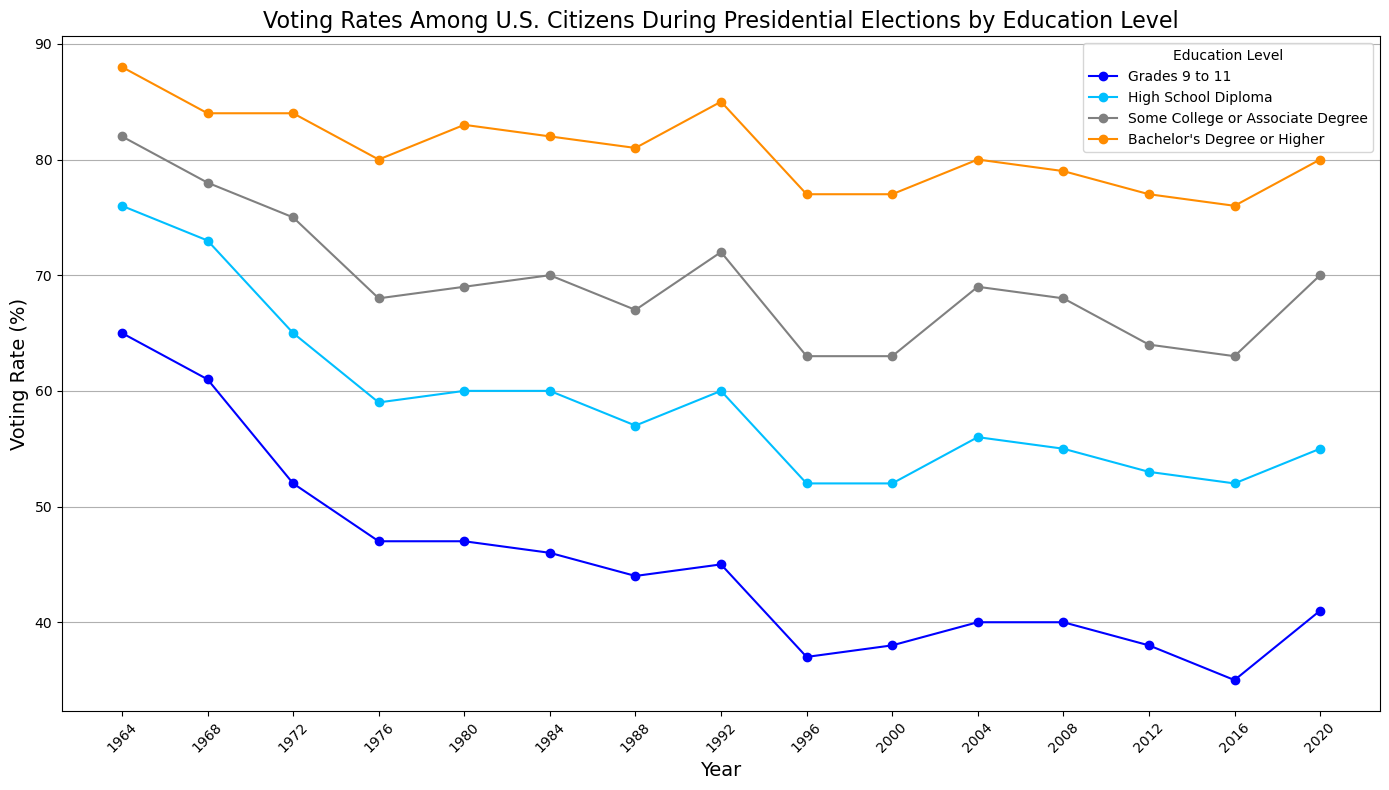

In [54]:
# Plotting the trend line chart
plt.figure(figsize=(14, 8))
education_levels = voting_data_clean['Education Level']

colors = ['blue', 'deepskyblue', 'grey', 'darkorange']

# Plot each education level's voting rate over time
for i, level in enumerate(education_levels):
    plt.plot(voting_data_clean.columns[1:], voting_data_clean.iloc[i, 1:], label=level, marker='o', color=colors[i])

plt.title('Voting Rates Among U.S. Citizens During Presidential Elections by Education Level', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Voting Rate (%)', fontsize=14)
plt.legend(title='Education Level')
plt.grid(True, axis = 'y')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Voting Rates Among U.S. Citizens During Presidential Elections by Education Level.jpg')

plt.show()

1. Higher Education, Higher Voting Rates: There's a clear positive correlation between the level of education and the likelihood of voting. Citizens with a Bachelor's degree or higher consistently show the highest voting rates, while those with education levels of grades 9 to 11 have the lowest.
2. General Decline and Recovery: All groups experienced a general decline in voting rates from the 1960s through the late 1990s, with a notable recovery or increase in rates in more recent elections.
3. Impact of Specific Elections: There are years where voting rates spike, such as in 1992, which might reflect the dynamics of a particular election, possibly driven by factors such as the appeal of candidates, socio-political climates, or specific issues at stake.

In [55]:
#load the new provided data to understand its structure and contents.
corrected_living_arrangements_file_path = './sample_data/LivingArrangementsofChildren.csv'
corrected_living_arrangements_data = pd.read_csv(corrected_living_arrangements_file_path)

# Display the first few rows of the dataframe to get an overview of the data
corrected_living_arrangements_data.head()


,Unnamed: 0,Highest Education Level of Either Parent,Living with Both Parents,Living with Mothers Only,Living with Fathers Only or Living with Neither Parent
0,NaN,Less than a High School Diploma,53%,38%,9%
1,NaN,High School Diploma,55%,36%,9%
2,NaN,Some College or Associate Degree,65%,29%,6%
3,NaN,Bachelor's Degree,84%,13%,3%
4,NaN,Advanced Degree,91%,7%,2%


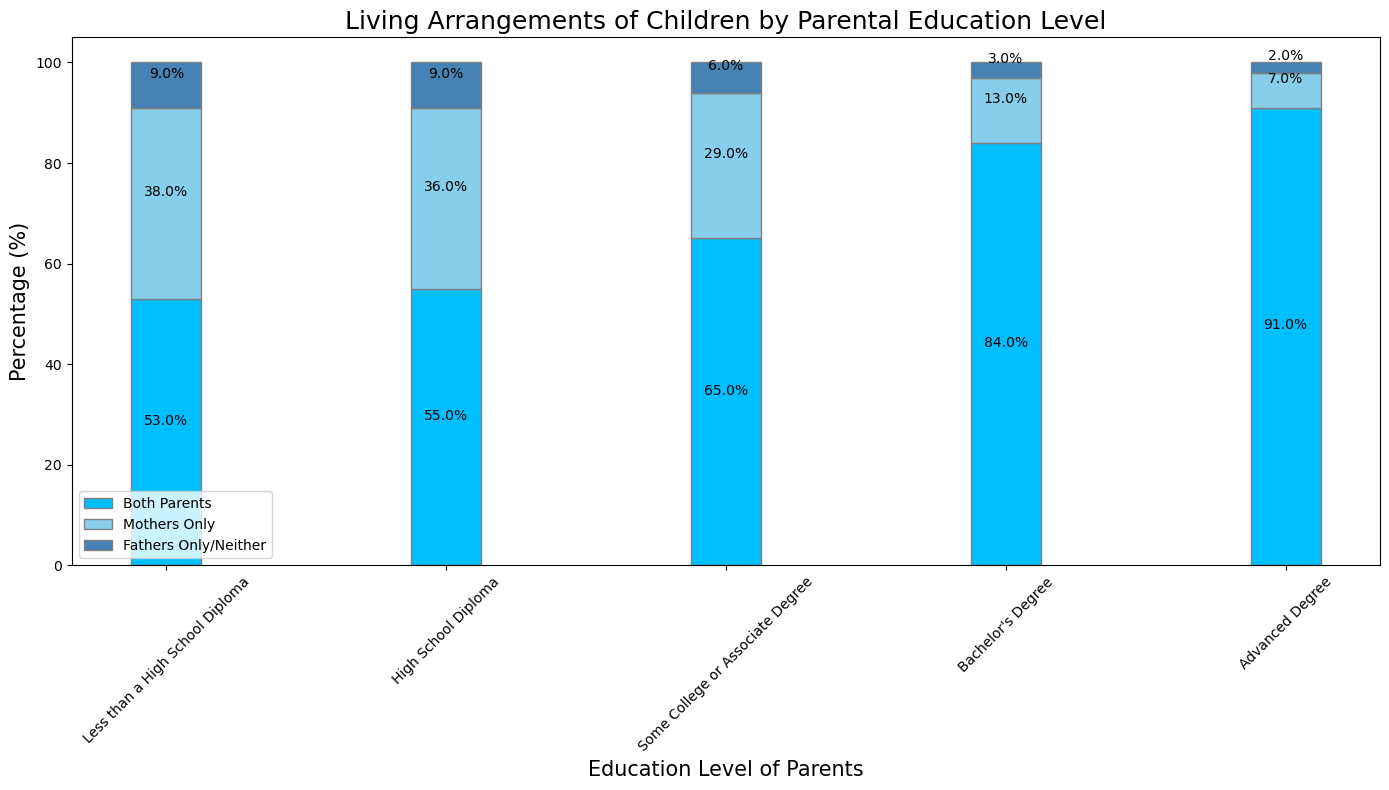

In [56]:
# Cleaning and converting percentage data for plotting
corrected_living_arrangements_data_clean = corrected_living_arrangements_data.copy()
for column in corrected_living_arrangements_data_clean.columns[2:]:
    corrected_living_arrangements_data_clean[column] = corrected_living_arrangements_data_clean[column].str.rstrip('%').astype('float')

# The x position of bars
education_levels_corrected = corrected_living_arrangements_data_clean['Highest Education Level of Either Parent']
bar_width_corrected = 0.25
r1_corrected = range(len(education_levels_corrected))
r2_corrected = [x + bar_width_corrected for x in r1_corrected]
r3_corrected = [x + bar_width_corrected for x in r2_corrected]


colors_from_image = {
    'Living with Both Parents': 'deepskyblue',  # Dark blue color
    'Living with Mothers Only': 'skyblue',  # Light blue color
    'Living with Fathers Only or Living with Neither Parent': 'steelblue'  # Grey color
}

# Adding percentage annotations on each bar
def add_labels(bars, data):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plotting the stacked bar chart with new colors
fig, ax = plt.subplots(figsize=(14, 8))

# Making the plot with stacked bars
bars1 = ax.bar(education_levels_corrected, corrected_living_arrangements_data_clean['Living with Both Parents'], 
       width=bar_width_corrected, label='Both Parents', edgecolor='grey', color=colors_from_image['Living with Both Parents'])
bars2 = ax.bar(education_levels_corrected, corrected_living_arrangements_data_clean['Living with Mothers Only'], 
       width=bar_width_corrected, label='Mothers Only', edgecolor='grey', color=colors_from_image['Living with Mothers Only'],
       bottom=corrected_living_arrangements_data_clean['Living with Both Parents'])
bars3 = ax.bar(education_levels_corrected, corrected_living_arrangements_data_clean['Living with Fathers Only or Living with Neither Parent'], 
       width=bar_width_corrected, label='Fathers Only/Neither', edgecolor='grey', color=colors_from_image['Living with Fathers Only or Living with Neither Parent'],
       bottom=corrected_living_arrangements_data_clean['Living with Both Parents'] + corrected_living_arrangements_data_clean['Living with Mothers Only'])

# Adding labels and title
ax.set_xlabel('Education Level of Parents', fontsize=15)
ax.set_ylabel('Percentage (%)', fontsize=15)
ax.set_title('Living Arrangements of Children by Parental Education Level', fontsize=18)
ax.set_xticks([r for r in range(len(education_levels_corrected))])
ax.set_xticklabels(education_levels_corrected)
ax.legend()

# Adding percentage annotations on each bar
add_labels(bars1, corrected_living_arrangements_data_clean['Living with Both Parents'])
add_labels(bars2, corrected_living_arrangements_data_clean['Living with Mothers Only'])
add_labels(bars3, corrected_living_arrangements_data_clean['Living with Fathers Only or Living with Neither Parent'])

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('./output/Living Arrangements of Children by Parental Education Level.jpg')

plt.show()



The graph indicates that higher parental education is associated with more traditional two-parent households, and conversely, lower education levels are associated with a higher incidence of single-parent, predominantly mother-only, households. This pattern may reflect broader socio-economic factors where education can influence family stability and living arrangements.

In [57]:
# Load the data from the provided CSV file
file_path = './sample_data/PercentageofIndividualsAge25andOlderWhoVolunteered.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and content
data.head()


,Education Level,All,Female,Male
0,Less than a High Schol Diploma,12%,13%,10%
1,High School Diploma,19%,22%,16%
2,"Some College, No Degree",29%,32%,27%
3,Associate Degree,33%,36%,31%
4,Bachelor's Degree,40%,44%,36%


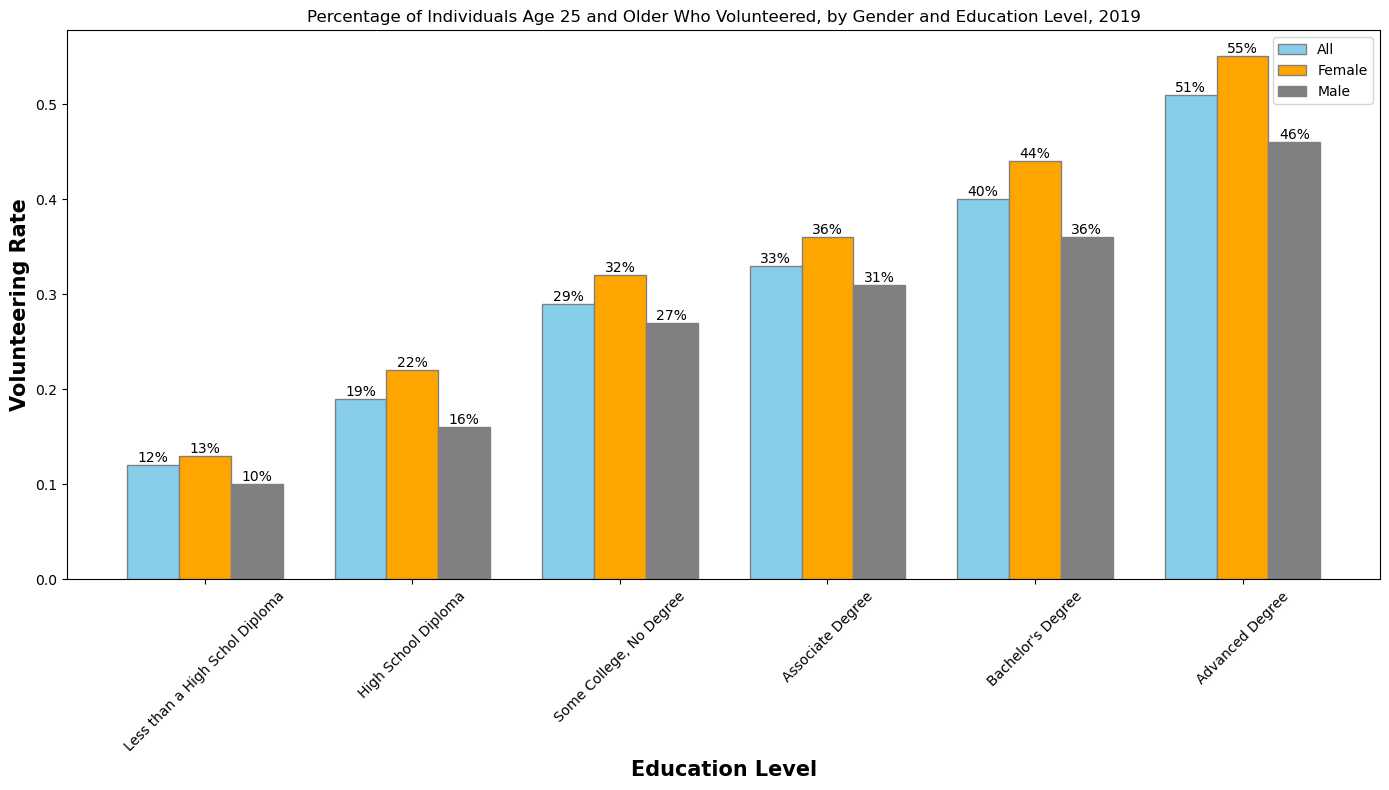

In [58]:
# Data preparation: Convert percentage strings to numbers
data['All'] = data['All'].str.rstrip('%').astype('float') / 100.0
data['Female'] = data['Female'].str.rstrip('%').astype('float') / 100.0
data['Male'] = data['Male'].str.rstrip('%').astype('float') / 100.0

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

bar_width = 0.25  # width of the bars

# Set the position of bar on X axis
r1 = np.arange(len(data['All']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot with annotations
bars1 = plt.bar(r1, data['All'], color='skyblue', width=bar_width, edgecolor='grey', label='All')
bars2 = plt.bar(r2, data['Female'], color='orange', width=bar_width, edgecolor='grey', label='Female')
bars3 = plt.bar(r3, data['Male'], color='grey', width=bar_width, edgecolor='grey', label='Male')

# Add data labels above the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0%}', ha='center', va='bottom')

# Add labels to the chart
plt.xlabel('Education Level', fontweight='bold', fontsize=15)
plt.ylabel('Volunteering Rate', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(data['All']))], data['Education Level'], rotation=45)
plt.title('Percentage of Individuals Age 25 and Older Who Volunteered, by Gender and Education Level, 2019')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()

plt.savefig('./output/Percentage of Individuals Age 25 and Older Who Volunteered, by Gender and Education Level, 2019.jpg')

# Display the plot
plt.show()

The visualized data elucidates a clear positive correlation between education level and the propensity to volunteer among individuals aged 25 and older in the United States. As educational attainment rises, there is a notable increase in volunteering rates.

Higher education not only contributes to individual income and employment prospects but also enhances civic participation and community engagement, as evidenced by increased volunteering rates.

In [59]:
# Load the new data from the provided CSV file
file_path_smoking = './sample_data/SmokingRate.csv'
smoking_data = pd.read_csv(file_path_smoking)

# Display the first few rows of the dataset to understand its structure and content
smoking_data.head()

,Year,Less than a High School Diploma,High School Diploma,Some College or Associate Degree,Bachelor's Degree or Higher
0,1940,35.8%,39.5%,40.8%,40.4%
1,1941,36.4%,40.0%,41.9%,40.7%
2,1942,37.5%,40.7%,42.9%,41.2%
3,1943,38.2%,41.7%,43.6%,41.5%
4,1944,39.1%,42.5%,44.3%,41.9%


In [60]:
# Data preparation: Convert percentage strings to numbers for the smoking rate data
for column in smoking_data.columns[1:]:  # Skip the first column which is 'Year'
    smoking_data[column] = smoking_data[column].str.rstrip('%').astype('float') / 100.0

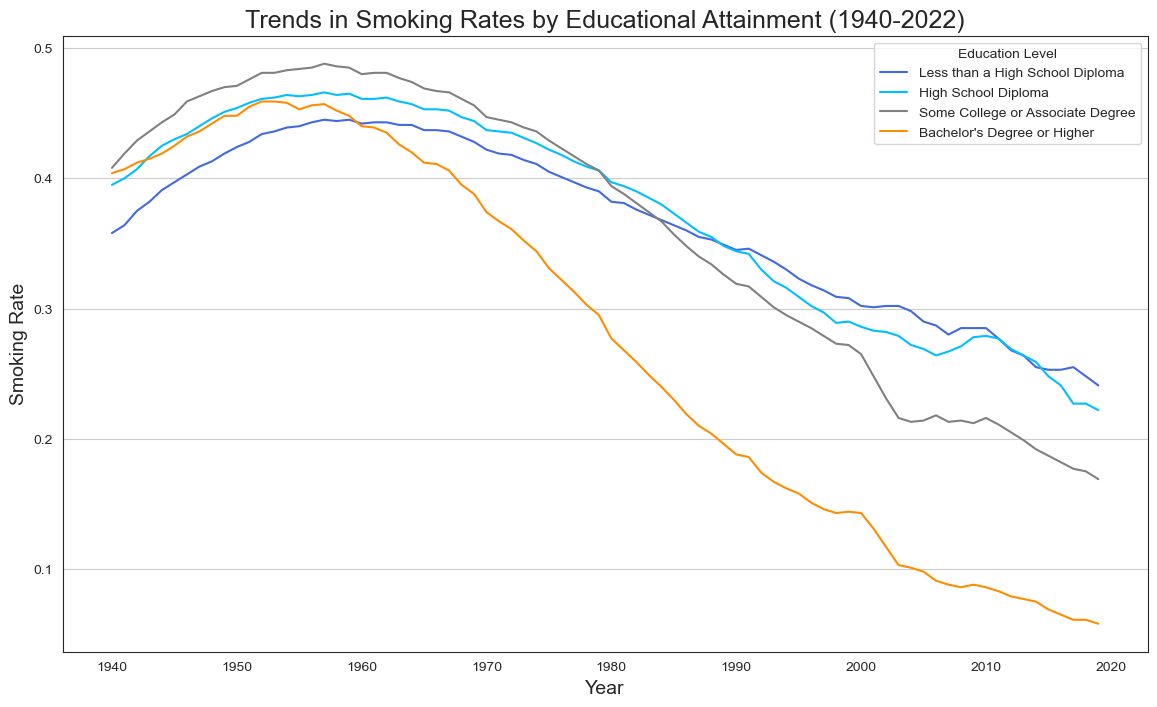

In [61]:
# Set the aesthetic style of the plots
sns.set_style("white")

# Colors for the lines
colors = ["royalblue", "deepskyblue", "grey", "darkorange"]

# Plot the data
plt.figure(figsize=(14, 8))
for idx, column in enumerate(smoking_data.columns[1:]):
    sns.lineplot(x=smoking_data['Year'], y=smoking_data[column], label=column, color=colors[idx])

# Adding the legend, title, and labels
plt.legend(title='Education Level')
plt.title('Trends in Smoking Rates by Educational Attainment (1940-2022)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Smoking Rate', fontsize=14)

 # Only show horizontal grid lines
plt.grid(True, axis='y') 

plt.savefig('./output/Trends in Smoking Rates by Educational Attainment (1940-2022).jpg')

# Display the line chart
plt.show()



This visualization indicates a clear association between higher education and lower smoking rates, especially in the latter half of the 20th century through to the 21st century. It suggests that educational attainment may play a role in health-conscious behavior.
- For all education levels, smoking rates rose until they peaked around the 1960s.
- After the peak, there has been a general decline in smoking rates across all educational categories.
- Individuals with "Less than a High School Diploma" consistently have higher smoking rates compared to other educational levels.
- Those with a "Bachelor's Degree or Higher" have the lowest smoking rates, particularly noticeable in recent years where the decline is steeper compared to other education levels.


In [62]:
# Load the new data from the provided CSV file
file_path_exercise = './sample_data/ExerciseRate.csv'
exercise_data = pd.read_csv(file_path_exercise)

# Display the first few rows of the dataset to understand its structure and content
exercise_data.head()


,Age,Education Level,Vigorous,Moderate
0,25 and Older,Less Than a High School Diploma,15%,32%
1,25 and Older,High School Diploma,19%,39%
2,25 and Older,"Some College, No Degree",27%,40%
3,25 and Older,Associate Degree,27%,41%
4,25 and Older,Bachelor's Degree or Higher,42%,40%


In [63]:
# Load the new data to see the first few rows and understand its structure
new_data_path = './sample_data/Percentageof3to5YearOldsParticipatinginActivitieswithaFamilyMember.csv'
activities_data = pd.read_csv(new_data_path)
activities_data.head()

,Activities,Less than a High School Diploma,High School Diploma,"Some College, No Degree",Associate Degree,Bachelor's Degree,Advanced Degree
0,Read to by Family Member Three or More Times i...,71%,80%,85%,84%,89%,93%
1,Did Arts and Crafts at Least Once in the Past ...,76%,89%,92%,91%,91%,89%
2,Visited a Library at Least Once in Past Month,26%,29%,36%,34%,43%,52%


In [64]:
# Colors for the different education levels
colors = ['royalblue', 'deepskyblue', 'lightskyblue', 'grey', 'darkorange', 'orange']

# Convert percentage strings to floats for plotting
for column in activities_data.columns[1:]:  # Skipping the first column which is 'Activities'
    activities_data[column] = activities_data[column].str.rstrip('%').astype('float')

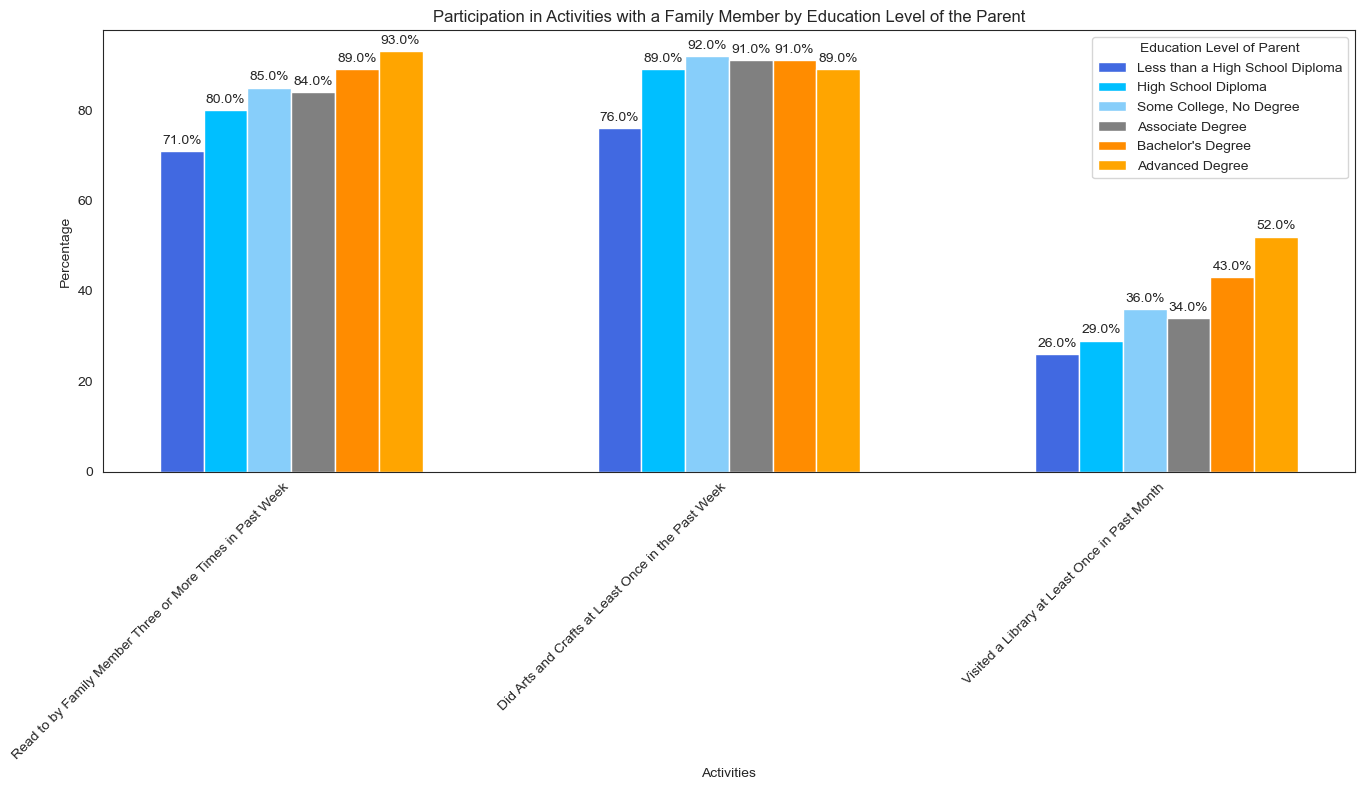

In [65]:
# Setting the positions and width for the bars
positions = range(len(activities_data))
bar_width = 0.1

# Plotting with annotations
fig, ax = plt.subplots(figsize=(14, 8))

# Create a bar for each education level category with annotations
for i, column in enumerate(activities_data.columns[1:]):
    bars = ax.bar([p + bar_width * i for p in positions], 
                  activities_data[column], 
                  width=bar_width, 
                  label=column,
                  color=colors[i])

    # Annotating each bar with the percentage value
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Activities')
ax.set_ylabel('Percentage')
ax.set_title('Participation in Activities with a Family Member by Education Level of the Parent')
ax.set_xticks([p + bar_width * (len(activities_data.columns) - 2) / 2 for p in positions])
ax.set_xticklabels(activities_data['Activities'], rotation=45, ha='right')
ax.legend(title='Education Level of Parent')

plt.savefig('./output/Participation in Activities with a Family Member by Education Level of the Parent.jpg')

plt.tight_layout()
plt.show()


- **Higher Education Correlates with Increased Activity Participation**: There's a clear trend that as the education level of the parent increases, the likelihood of the child participating in these activities also increases. For instance, children whose parents have an advanced degree are more likely to be read to three or more times a week compared to children whose parents have less than a high school diploma.

- **The Importance of Early Education**:The activities listed are developmental and educational, and their high participation rates among all groups highlight the general recognition of the importance of early education and family engagement in learning-related activities.

In [66]:
school_involvement_data_path = './sample_data/Percentage of Elementary and Secondary School Children Whose Parents Were Involved in School.csv'
school_involvement_data = pd.read_csv(school_involvement_data_path)
school_involvement_data.head()

,Unnamed: 0,Attended a General School or PTO/PTA Meeting,Attended a Parent-Teacher Conference,Attended a Class Event,Volunteered at School
0,Less than a High School Diploma,82%,68%,61%,25%
1,High School Diploma,82%,71%,69%,28%
2,"Some College, No Degree",87%,75%,77%,37%
3,Associate Degree,89%,76%,83%,41%
4,Bachelor's Degree,92%,78%,86%,54%


In [67]:
# Load the dataset
file_path = './sample_data/Percentage of Elementary and Secondary School Children Whose Parents Were Involved in School.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the columns of the dataset to understand its structure
data.head()

,Unnamed: 0,Attended a General School or PTO/PTA Meeting,Attended a Parent-Teacher Conference,Attended a Class Event,Volunteered at School
0,Less than a High School Diploma,82%,68%,61%,25%
1,High School Diploma,82%,71%,69%,28%
2,"Some College, No Degree",87%,75%,77%,37%
3,Associate Degree,89%,76%,83%,41%
4,Bachelor's Degree,92%,78%,86%,54%


In [68]:
# Convert percentage columns to float
for col in data.columns[1:]:
    data[col] = data[col].str.rstrip('%').astype('float')

# Rename the first column to 'Education Level' for clarity
data.rename(columns={'Unnamed: 0': 'Education Level'}, inplace=True)

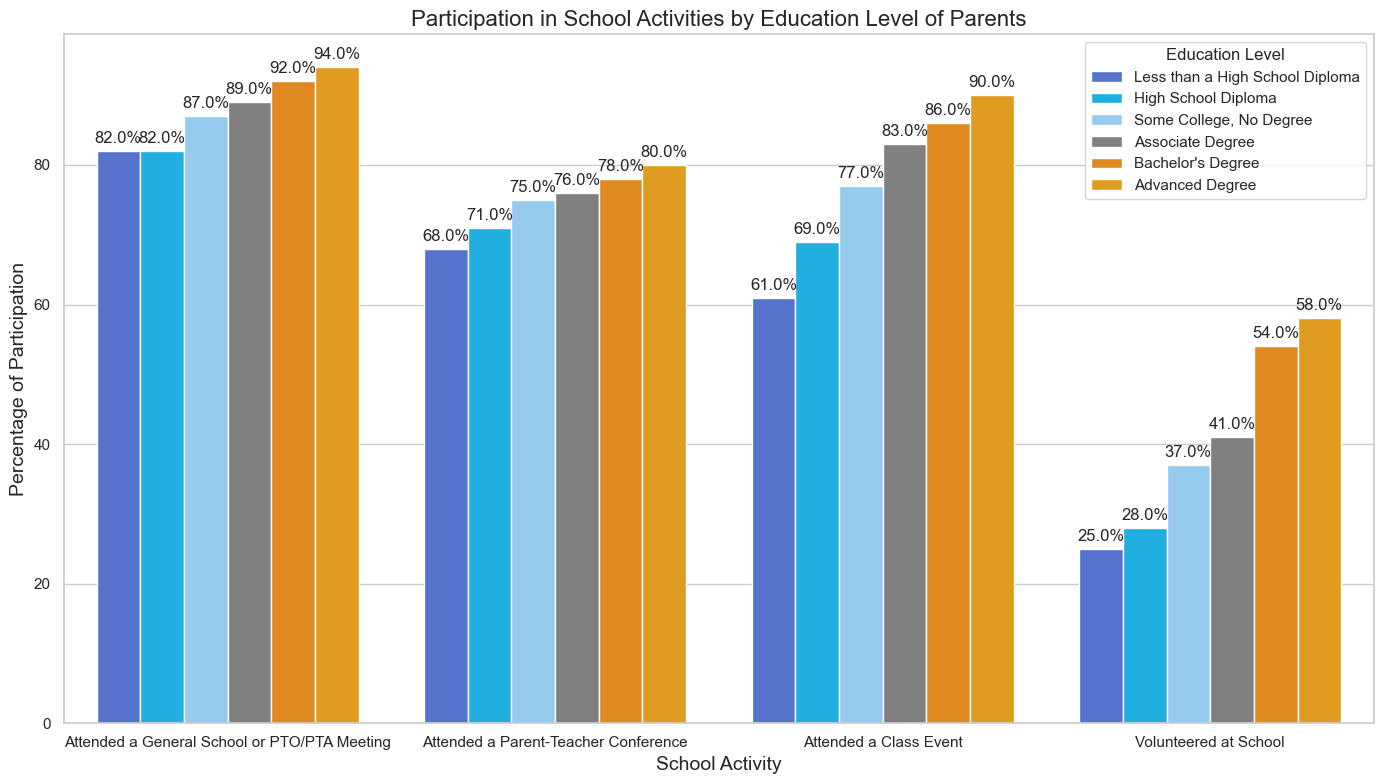

In [69]:
# Set up the matplotlib figure and axes with the new color palette
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Specify custom color palette
custom_palette = ['royalblue', 'deepskyblue', 'lightskyblue', 'grey', 'darkorange', 'orange']

# Create the grouped bar chart with the custom color palette
ax = sns.barplot(data=data.melt(id_vars=["Education Level"], var_name="Activity", value_name="Percentage"),
                 x="Activity", y="Percentage", hue="Education Level", palette=custom_palette)

# Add the percentage annotations above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Final adjustments
plt.title('Participation in School Activities by Education Level of Parents', fontsize=16)
plt.xlabel('School Activity', fontsize=14)
plt.ylabel('Percentage of Participation', fontsize=14)
plt.legend(title='Education Level')
plt.tight_layout()

plt.savefig('./output/Participation in School Activities by Education Level of Parents.jpg')

# Show the plot
plt.show()
